In [ ]:
import gdown

!gdown --id 1-QnB6EPbDpqWQHx2q_w6Va4wVqGpmCZj

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-QnB6EPbDpqWQHx2q_w6Va4wVqGpmCZj
To: /content/train.csv
100% 461k/461k [00:00<00:00, 80.5MB/s]


In [ ]:
# Работа с массивами данных
import numpy as np

# Работа с табличными данными
import pandas as pd

import tensorflow as tf
from tensorflow import keras

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, Concatenate, concatenate
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Масштабирование данных
from sklearn.preprocessing import StandardScaler

# MAE
from sklearn.metrics import mean_absolute_error

# Отрисовка графиков
import matplotlib.pyplot as plt
import seaborn as sns

# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)  # Показывать все столбцы

df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [ ]:
# Восстановление стандартных настроек.

pd.reset_option('display.max_columns')

Столбец SalePrice выступает целевой переменной.

Остальные столбцы признаками.

Определим их влияние.

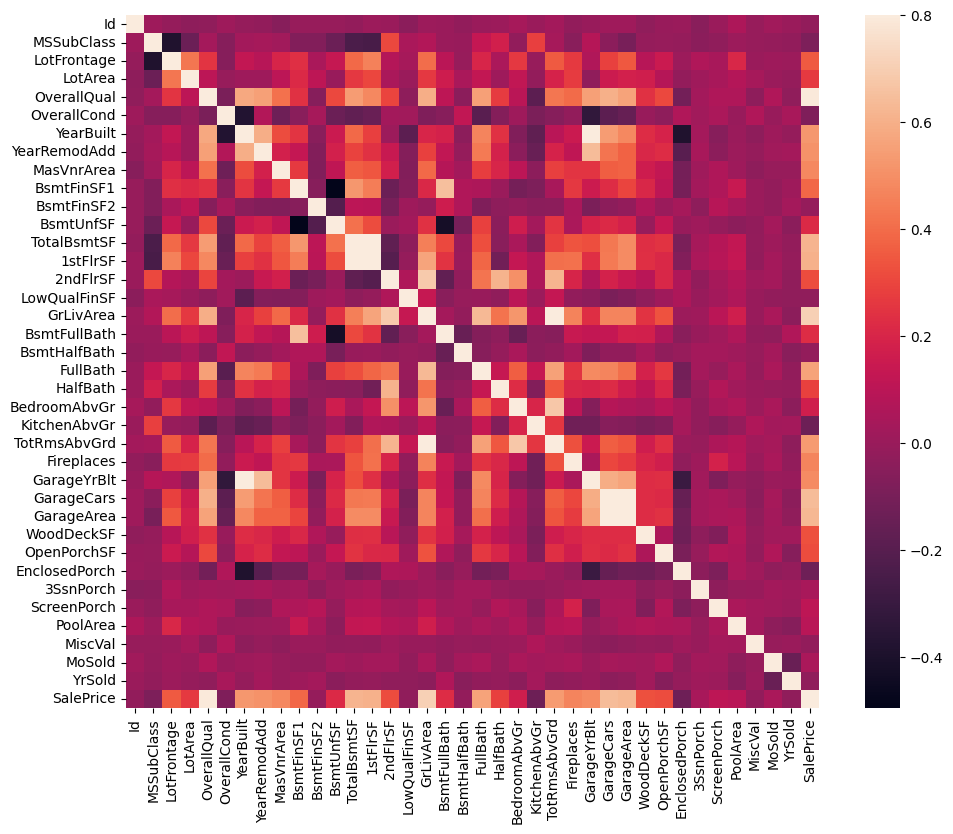

In [ ]:
# Использование тепловой карты
# для просмотра корреляции для всех числовых переменных

corrmat= df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

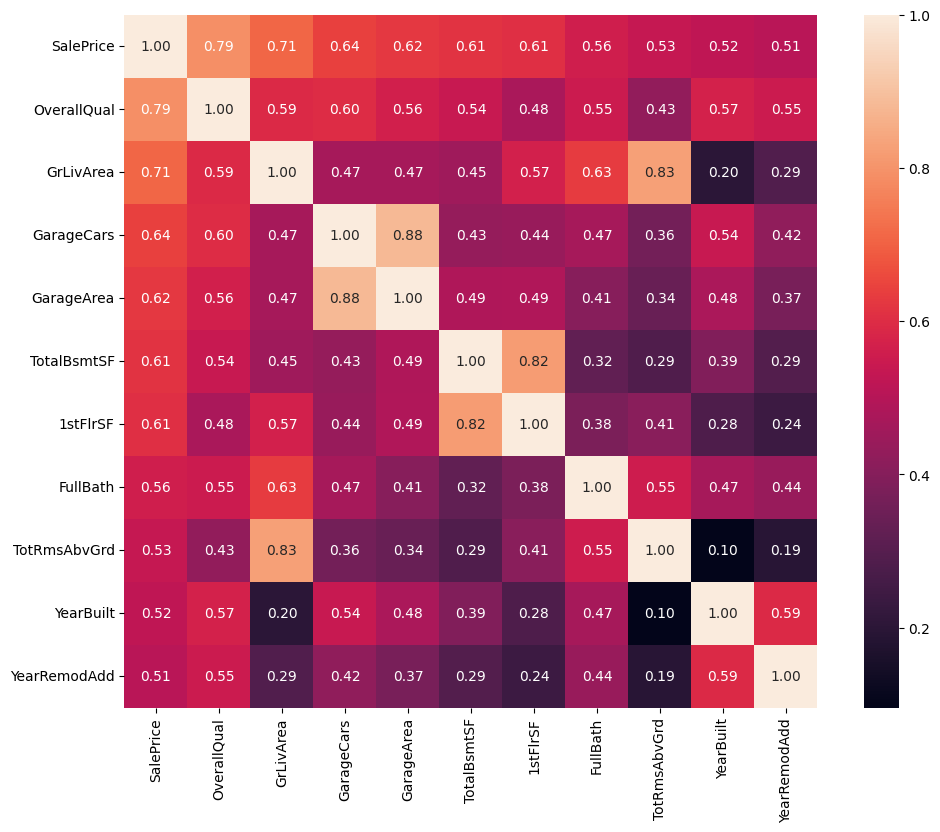

In [ ]:
# Возьмем лучшие 10 корреляций для числовых переменных и целевой переменной (SalePrice).

corrmat_top_10 = corrmat.nlargest(11, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[corrmat_top_10].values.T)
f, ax = plt.subplots(figsize=(12,9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size':10}, yticklabels=corrmat_top_10.values,
                 xticklabels=corrmat_top_10.values)

In [ ]:
corrmat_top_10

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

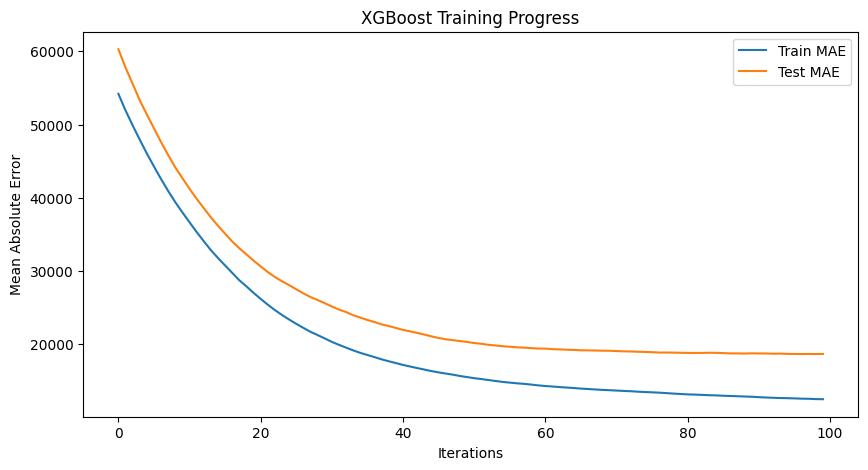

XGBoost MAE: 18641.31
Random Forest MAE: 18723.65


In [ ]:
# Проведем пробный анализ с XGBoost, используя RandomForestRegressor

import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Загрузка данных
df = pd.read_csv('train.csv')

# Выбираем признаки и целевую переменную
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
            'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
            'YearBuilt', 'YearRemodAdd']
target = 'SalePrice'

X = df[features]
y = df[target]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=5,
                             subsample=0.8, colsample_bytree=0.8, eval_metric='mae')

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)]

xgb_model.fit(X_train_scaled, y_train, eval_set=eval_set, verbose=False)

# График обучения XGBoost
evals_result = xgb_model.evals_result()
plt.figure(figsize=(10, 5))
plt.plot(evals_result['validation_0']['mae'], label='Train MAE')
plt.plot(evals_result['validation_1']['mae'], label='Test MAE')
plt.xlabel('Iterations')
plt.ylabel('Mean Absolute Error')
plt.title('XGBoost Training Progress')
plt.legend()
plt.show()

# Оценка модели XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f'XGBoost MAE: {mae_xgb:.2f}')

# Обучение Random Forest
rf_model = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Оценка модели Random Forest
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Random Forest MAE: {mae_rf:.2f}')



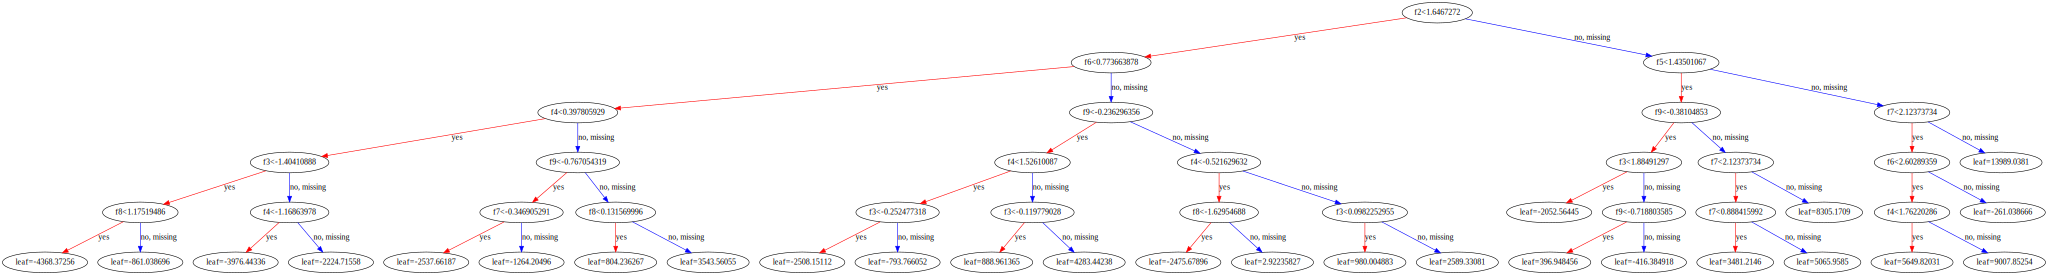

In [ ]:
# Получить Booster
booster = xgb_model.get_booster()

# Вывести дерево в Graphviz-формате
xgb.to_graphviz(booster, num_trees=0)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 181354.9219 - val_loss: 178825.7344
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 181709.0312 - val_loss: 178618.4844
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 182032.3125 - val_loss: 177435.5000
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 181378.6406 - val_loss: 173706.8594
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 174201.8594 - val_loss: 165160.6875
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 166931.5156 - val_loss: 150026.5000
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 152479.4688 - val_loss: 130138.5469
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 126980.0312 - val_loss: 111608.9141
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 112230.3047 - val_loss: 95820.5859
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 95079.5781 - val_loss: 77919.1797
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76

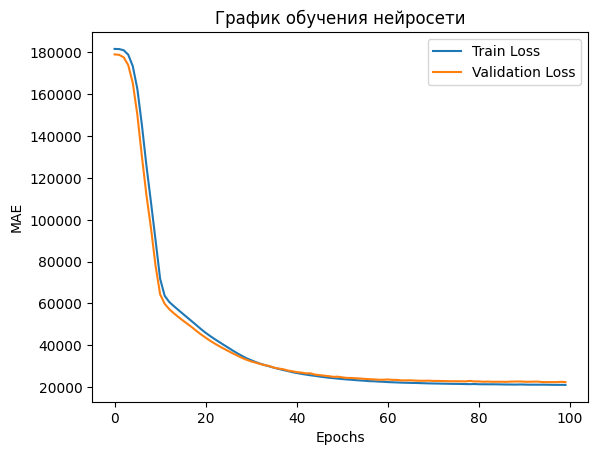

In [ ]:
# Загрузка данных
df = pd.read_csv('train.csv')

# Выбираем признаки и целевую переменную
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
            'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
            'YearRemodAdd']
target = 'SalePrice'

X = df[features]
y = df[target]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание модели нейросети
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)  # Выходной слой для регрессии
])

# Компиляция модели
model.compile(optimizer='adam', loss='mae')

# Обучение модели
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,
                                                              y_test),
                    epochs=100, batch_size=16, verbose=1)

# Оценка модели
predictions = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# График обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('График обучения нейросети')
plt.show()


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

Первичный эксперимент внезапно показал несколько большую точность классического ML. Необходимы дополнительные эксперименты.

Введем нрвые аеременные, преобразованные из порядковых в векторный вид.

Например Functional:

Typ Типичная функциональность

Min1 Незначительные вычеты 1

Min2 Незначительные вычеты 2

Mod Умеренные вычеты

Maj1 Крупные вычеты 1

Maj2 Крупные вычеты 2

Sev Серьезно поврежден

Sal Только утиль

In [ ]:
# Класс functional - Функциональность дома

functional_class = [0,
              {'Typ' : 0,
               'Min1': 1,
               'Min2': 2,
               'Mod' : 3,
               'Maj1': 4,
               'Maj2': 5,
               'Sev' : 6,
               'Sal' : 7,
              }]

# Класс OverallCond - Оценивает общее состояние дома

overallcond_class = [0,
              {'10 Very Excellent' : 0,
               '9  Excellent'      : 1,
               '8  Very Good'      : 2,
               '7  Good'           : 3,
               '6  Above Average'  : 4,
               '5  Average'        : 5,
               '4  Below Average'  : 6,
               '3  Fair'           : 7,
               '2  Poor'           : 8,
               '1  Very Poor'      : 9,
              }]

# Класс OverallQual - Оценивает общие материалы и отделку дома

overallqual_class = [0,
              {'10 Very Excellent' : 0,
               '9  Excellent'      : 1,
               '8  Very Good'      : 2,
               '7  Good'           : 3,
               '6  Above Average'  : 4,
               '5  Average'        : 5,
               '4  Below Average'  : 6,
               '3  Fair'           : 7,
               '2  Poor'           : 8,
               '1  Very Poor'      : 9,
              }]

# Класс HouseStyle - Стиль жилища

housestyle_class = [0,
              {'1Story'            : 0,
               '1.5Fin'            : 1,
               '1.5Unf'            : 2,
               '2Story'            : 3,
               '2.5Fin'            : 4,
               '2.5Unf'            : 5,
               'SFoyer'            : 6,
               'SLvl	Split Level' : 7,
              }]

# Класс BldgType - Тип жилья

bldgtype_class = [0,
              {'1Fam'   : 0,
               '2FmCon' : 1,
               'Duplx'  : 2,
               'TwnhsE' : 3,
               'TwnhsI' : 4,
               '2.5Unf' : 5,
              }]

# Класс Condition1 - Близость к различным условиям

condition1_class = [0,
              {'Artery' : 0,
               'Feedr'  : 1,
               'Norm'   : 2,
               'RRNn'   : 3,
               'RRAn'   : 4,
               'PosN'   : 5,
               'PosA'   : 6,
               'RRNe'   : 7,
               'RRAe'   : 8,
              }]

# Класс Condition2 Близость к различным условиям (если присутствует более одного)

condition2_class = [0,
              {'Artery' : 0,
               'Feedr'  : 1,
               'Norm'   : 2,
               'RRNn'   : 3,
               'RRAn'   : 4,
               'PosN'   : 5,
               'PosA'   : 6,
               'RRNe'   : 7,
               'RRAe'   : 8,
              }]

# Класс Neighborhood - Физические местоположения в пределах города Ames

neighborhood_class = [0,
              {'Blmngtn' : 0,
               'Blueste' : 1,
               'BrDale'  : 2,
               'BrkSide' : 3,
               'ClearCr' : 4,
               'CollgCr' : 5,
               'Crawfor' : 6,
               'Edwards' : 7,
               'Gilbert' : 8,
               'IDOTRR'  : 9,
               'MeadowV' : 10,
               'Mitchel' : 11,
               'Names'   : 12,
               'NoRidge' : 13,
               'NPkVill' : 14,
               'NridgHt' : 15,
               'NWAmes'  : 16,
               'OldTown' : 17,
               'SWISU'   : 18,
               'Sawyer'  : 19,
               'SawyerW' : 20,
               'Somerst' : 21,
               'StoneBr' : 22,
               'Timber'  : 23,
               'Veenker' : 24,
               }]

# Класс LandSlope - Уклон участка

landslope_class = [0,
              {'Gtl' : 0,
               'Mod' : 1,
               'Sev' : 2,
              }]

# Класс LotConfig - Конфигурация участка

lotconfig_class = [0,
              {'Inside' : 0,
               'Corner' : 1,
               'CulDSac': 2,
               'FR2'    : 3,
               'FR3'    : 4,
              }]
# Класс Utilities - Тип доступных коммунальных услуг

utilities_class = [0,
              {'AllPub'  : 0,
               'NoSewr'  : 1,
               'NoSeWa'  : 2,
               'ELO'     : 3,
              }]

# Класс LandContour - Ровность собственности

landcontour_class = [0,
              {'Lvl' : 0,
               'Bnk' : 1,
               'HLS' : 2,
               'Low' : 3,
              }]
# Класс OverallQual - Оценивает общие материалы и отделку дома

overallqual_class = [0,
              {'10 Very Excellent' : 0,
               '9  Excellent'      : 1,
               '8  Very Good'      : 2,
               '7  Good'           : 3,
               '6  Above Average'  : 4,
               '5  Average'        : 5,
               '4  Below Average'  : 6,
               '3  Fair'           : 7,
               '2  Poor'           : 8,
               '1  Very Poor'      : 9,
              }]


In [ ]:
our_classes = [
    functional_class,
    overallcond_class,
    overallqual_class,
    housestyle_class,
    bldgtype_class,
    condition1_class,
    neighborhood_class,
    landslope_class,
    lotconfig_class,
    utilities_class,
    landcontour_class,
    overallqual_class
]


# Вычисление счетчиков для данных разбиения
for class_desc in our_classes:

    if isinstance(class_desc[1], list):
        class_desc[0] = len(class_desc[1]) + 1

    else:
        class_desc[0] = max(class_desc[1].values()) + 1

neighborhood_class

[25,
 {'Blmngtn': 0,
  'Blueste': 1,
  'BrDale': 2,
  'BrkSide': 3,
  'ClearCr': 4,
  'CollgCr': 5,
  'Crawfor': 6,
  'Edwards': 7,
  'Gilbert': 8,
  'IDOTRR': 9,
  'MeadowV': 10,
  'Mitchel': 11,
  'Names': 12,
  'NoRidge': 13,
  'NPkVill': 14,
  'NridgHt': 15,
  'NWAmes': 16,
  'OldTown': 17,
  'SWISU': 18,
  'Sawyer': 19,
  'SawyerW': 20,
  'Somerst': 21,
  'StoneBr': 22,
  'Timber': 23,
  'Veenker': 24}]

In [ ]:
neighborhood_class[0]

25

In [ ]:
# Будем исключать некоторые параметры

from tensorflow.keras.utils import to_categorical

column_names = [
    'Functional', 'OverallCond', 'OverallQual',
    'HouseStyle', 'BldgType', 'Condition1',
    'Neighborhood', 'Utilities', 'LandContour',
]

one_hot_encoded = []

for class_desc, column in zip(our_classes, column_names):
    mapping_dict = class_desc[1]
    num_classes = class_desc[0]

    # Преобразуем строковые значения в числа по словарю
    df[column + '_cat'] = df[column].map(mapping_dict)

    # Проверка на наличие NaN после преобразования
    if df[column + '_cat'].isnull().any():
        print(f"[!] Предупреждение: В колонке '{column}' есть значения, отсутствующие в словаре:")
        print(df.loc[df[column + '_cat'].isnull(), column].unique())

        # Обработка: можно либо удалить такие строки, либо заменить на 0
        # Здесь выберем замену на 0 (или другой класс, если разумно)
        df[column + '_cat'] = df[column + '_cat'].fillna(0).astype(int)
    else:
        df[column + '_cat'] = df[column + '_cat'].astype(int)

    # One-hot encoding
    encoded = to_categorical(df[column + '_cat'], num_classes=num_classes)
    encoded_df = pd.DataFrame(encoded, columns=[f"{column}_{i}" for i in range(num_classes)])
    one_hot_encoded.append(encoded_df)

# Собираем итоговый датафрейм
df_one_hot = pd.concat(one_hot_encoded, axis=1)

# Если нужно, можно удалить промежуточные _cat столбцы:
# df.drop(columns=[col + '_cat' for col in column_names], inplace=True)



[!] Предупреждение: В колонке 'OverallCond' есть значения, отсутствующие в словаре:
[5 8 6 7 4 2 3 9 1]
[!] Предупреждение: В колонке 'OverallQual' есть значения, отсутствующие в словаре:
[ 7  6  8  5  9  4 10  3  1  2]
[!] Предупреждение: В колонке 'HouseStyle' есть значения, отсутствующие в словаре:
['SLvl']
[!] Предупреждение: В колонке 'BldgType' есть значения, отсутствующие в словаре:
['2fmCon' 'Duplex' 'Twnhs']
[!] Предупреждение: В колонке 'Neighborhood' есть значения, отсутствующие в словаре:
['NAmes']
[!] Предупреждение: В колонке 'Utilities' есть значения, отсутствующие в словаре:
['AllPub' 'NoSeWa']
[!] Предупреждение: В колонке 'LandContour' есть значения, отсутствующие в словаре:
['Lvl' 'Bnk' 'Low' 'HLS']


In [ ]:
df_one_hot.shape

(1460, 84)

In [ ]:
# Соединяем one-hot признаки с целевой переменной
df_corr = pd.concat([df_one_hot, df['SalePrice']], axis=1)

# Считаем корреляцию каждого one-hot признака с SalePrice
correlations = df_corr.corr()['SalePrice'].sort_values(ascending=False)

# Удаляем саму SalePrice из списка
correlations = correlations.drop('SalePrice')

# Выводим топ-20 признаков по корреляции с SalePrice
print(correlations.head(20))

Neighborhood_15    0.402149
Neighborhood_13    0.330424
HouseStyle_3       0.242880
Neighborhood_22    0.215363
Neighborhood_21    0.140058
Neighborhood_23    0.126236
Functional_0       0.116462
Condition1_2       0.112968
Neighborhood_5     0.072626
Neighborhood_6     0.071160
Neighborhood_24    0.063471
Neighborhood_4     0.055718
Condition1_5       0.049541
Condition1_6       0.042017
HouseStyle_4       0.036526
Neighborhood_8     0.035940
Neighborhood_16    0.023483
Condition1_3       0.023236
Neighborhood_20    0.014560
Condition1_4       0.005893
Name: SalePrice, dtype: float64


In [ ]:
# Выбираем признаки и целевую переменную
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
            'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
target = 'SalePrice'

# Стандартизация данных
scaler = StandardScaler()
df_scaled_features = scaler.fit_transform(df[features])
df_scaled_target = scaler.fit_transform(df[[target]])

df_one_hot_df = pd.DataFrame(df_one_hot, index=df.index)
df_scaled_features_df = pd.DataFrame(df_scaled_features, columns=features, index=df.index)

# Собираем итоговый датафрейм
df_features = pd.concat([df_one_hot, df_scaled_features_df], axis=1)


X = df_features.to_numpy()
y = df_scaled_target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


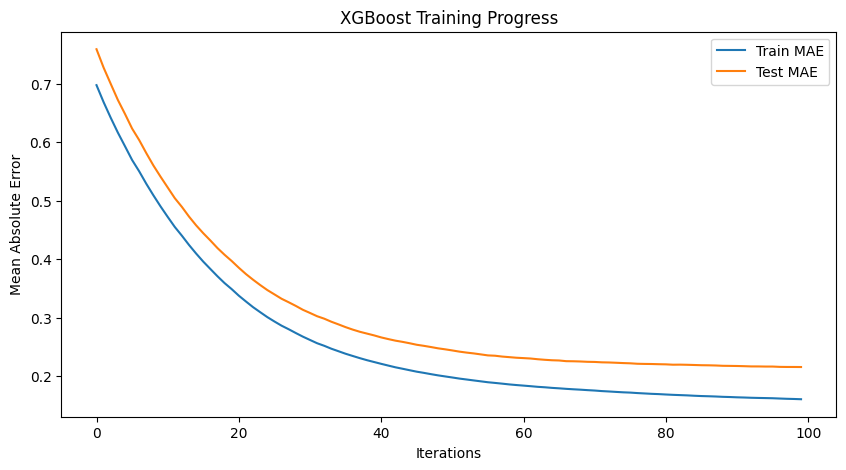

XGBoost MAE: 0.22


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest MAE: 0.23


In [ ]:
# Обучение XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=5,
                             subsample=0.8, colsample_bytree=0.8, eval_metric='mae')

eval_set = [(X, y), (X_test, y_test)]

xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# График обучения XGBoost
evals_result = xgb_model.evals_result()
plt.figure(figsize=(10, 5))
plt.plot(evals_result['validation_0']['mae'], label='Train MAE')
plt.plot(evals_result['validation_1']['mae'], label='Test MAE')
plt.xlabel('Iterations')
plt.ylabel('Mean Absolute Error')
plt.title('XGBoost Training Progress')
plt.legend()
plt.show()

# Оценка модели XGBoost
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f'XGBoost MAE: {mae_xgb:.2f}')

# Обучение Random Forest
rf_model = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Оценка модели Random Forest
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Random Forest MAE: {mae_rf:.2f}')

In [ ]:
def inverse_mae(y_true_scaled, y_pred_scaled, scaler_y):
    """
    Переводит нормализованный MAE обратно в исходные единицы.

    Параметры:
    - y_true_scaled: нормализованные истинные значения
    - y_pred_scaled: нормализованные предсказания
    - scaler_y: StandardScaler, обученный на y

    Возвращает:
    - mae_orig: MAE в исходных единицах
    - y_true_orig, y_pred_orig: восстановленные значения
    """
    y_true_orig = scaler_y.inverse_transform(y_true_scaled.reshape(-1, 1))
    y_pred_orig = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
    mae_orig = mean_absolute_error(y_true_orig, y_pred_orig)
    return mae_orig, y_true_orig, y_pred_orig

In [ ]:
# Применение для XGBoost
mae_orig_xgb, y_test_orig_xgb, y_pred_orig_xgb = inverse_mae(y_test, y_pred_xgb, scaler)
print(f"XGBoost MAE в долларах: {mae_orig_xgb:.2f}")

# Применение для нейросети
#mae_orig_nn, y_test_orig_nn, y_pred_orig_nn = inverse_mae(y_test, predictions, scaler)
#print(f"Нейросеть MAE в долларах: {mae_orig_nn:.2f}")

XGBoost MAE в долларах: 17148.05


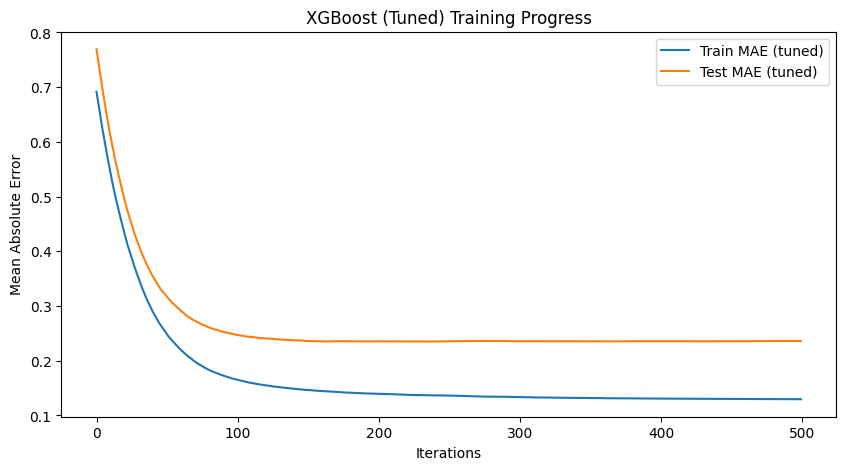

🎯 Tuned XGBoost MAE: 0.24


In [ ]:
# Изменим гиперпараметры XGBoost
xgb_model_tuned = xgb.XGBRegressor(
    n_estimators=500,          # Увеличим число деревьев
    learning_rate=0.03,        # Сделаем обучение медленнее
    max_depth=7,               # Увеличим глубину деревьев
    subsample=0.7,             # Меньше данных в каждой итерации
    colsample_bytree=0.7,      # Меньше признаков в каждом дереве
    min_child_weight=3,        # Увеличим минимальный вес для узлов
    gamma=0.1,                 # Добавим регуляризацию на расщепления
    reg_alpha=0.1,             # L1-регуляризация
    reg_lambda=1.0,            # L2-регуляризация
    eval_metric='mae',
    random_state=42
)

# Обучим модель с новым набором гиперпараметров
eval_set_tuned = [(X_train_scaled, y_train), (X_test_scaled, y_test)]
xgb_model_tuned.fit(X_train_scaled, y_train, eval_set=eval_set_tuned, verbose=False)

# Отрисуем график ошибки
evals_result_tuned = xgb_model_tuned.evals_result()
plt.figure(figsize=(10, 5))
plt.plot(evals_result_tuned['validation_0']['mae'], label='Train MAE (tuned)')
plt.plot(evals_result_tuned['validation_1']['mae'], label='Test MAE (tuned)')
plt.xlabel('Iterations')
plt.ylabel('Mean Absolute Error')
plt.title('XGBoost (Tuned) Training Progress')
plt.legend()
plt.show()

# Оценка тюнингованной модели
y_pred_xgb_tuned = xgb_model_tuned.predict(X_test_scaled)
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
print(f'🎯 Tuned XGBoost MAE: {mae_xgb_tuned:.2f}')

In [ ]:
print(f'Original XGBoost MAE: {mae_xgb:.2f}')
print(f'Tuned XGBoost MAE: {mae_xgb_tuned:.2f}')
print(f'Random Forest MAE: {mae_rf:.2f}')

Original XGBoost MAE: 0.22
Tuned XGBoost MAE: 0.24
Random Forest MAE: 0.23


In [ ]:
# Применение для XGBoost
mae_orig_xgb, y_test_orig_xgb, y_pred_orig_xgb = inverse_mae(y_test, y_pred_xgb_tuned, scaler)
print(f"Tuned XGBoost MAE в долларах: {mae_orig_xgb:.2f}")

# Применение для нейросети
#mae_orig_nn, y_test_orig_nn, y_pred_orig_nn = inverse_mae(y_test, predictions, scaler)
#print(f"Нейросеть MAE в долларах: {mae_orig_nn:.2f}")

Tuned XGBoost MAE в долларах: 18750.48


Немного выросла ошибка, станем использовать предыдущую модель.

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5332 - val_loss: 0.2919
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2675 - val_loss: 0.2499
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2243 - val_loss: 0.2384
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2091 - val_loss: 0.2378
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2065 - val_loss: 0.2335
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1975 - val_loss: 0.2295
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1823 - val_loss: 0.2350
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1973 - val_loss: 0.2310
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1817 - val_loss: 0.2248
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1799 - val_loss: 0.2327
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Absolute Error: 0.23


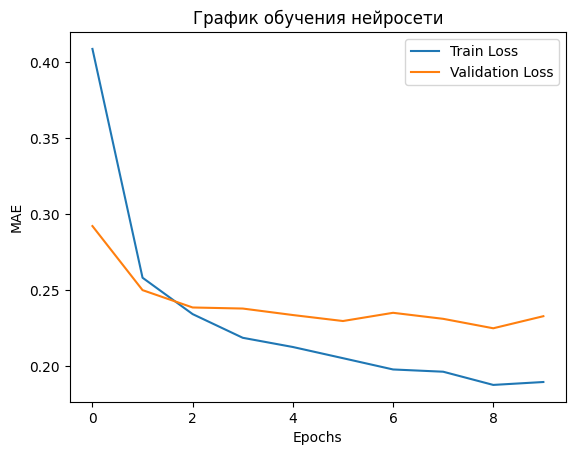

In [ ]:
# Создание модели нейросети
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)  # Выходной слой для регрессии
])

# Компиляция модели
model.compile(optimizer='adam', loss=['mae'])

# Обучение модели
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=16, verbose=1)

# Оценка модели
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# График обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('График обучения нейросети')
plt.show()

In [ ]:
def inverse_mae(y_true_scaled, y_pred_scaled, scaler_y):
    """
    Переводит нормализованный MAE обратно в исходные единицы.

    Параметры:
    - y_true_scaled: нормализованные истинные значения
    - y_pred_scaled: нормализованные предсказания
    - scaler_y: StandardScaler, обученный на y

    Возвращает:
    - mae_orig: MAE в исходных единицах
    - y_true_orig, y_pred_orig: восстановленные значения
    """
    y_true_orig = scaler_y.inverse_transform(y_true_scaled.reshape(-1, 1))
    y_pred_orig = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
    mae_orig = mean_absolute_error(y_true_orig, y_pred_orig)
    return mae_orig, y_true_orig, y_pred_orig


In [ ]:
# Функция оценки результатов и вывода оценки

def eval_net(model, x_train, y_train, y_scaler = None, n = 5, limit = 2):
    plt.style.use('default')

    pred = model.predict(x_train)             # Предсказание на тренировочной выборке
    if y_scaler:                              # Если есть нормирование - то денормировать
        pred = y_scaler.inverse_transform(pred)
        print('денормирование y_train')

    print('Средняя абсолютная ошибка:', mean_absolute_error(pred, y_train), '\n')

    for i in range(n):
        print('Реальное значение: {:6.2f}  Предсказанное значение: {:6.2f}  Разница: {:6.2f}'.format(y_train[i, 0],
                                                                                                    pred[i, 0],
                                                                                                    abs(y_train[i, 0] - pred[i, 0])))
    # Построение картинки разброса предсказанных и верных значений зарплаты
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(y_train, pred)                 # Отрисовка точечного графика
    ax.set_xlim(0, limit)                     # Пределы по x, y
    ax.set_ylim(0, limit)
    ax.plot(plt.xlim(), plt.ylim(), 'r')      # Отрисовка диагональной линии
    plt.xlabel('Правильные значения')
    plt.ylabel('Предсказания')
    plt.grid()
    plt.show()

In [ ]:
# Применение для XGBoost
mae_orig_xgb, y_test_orig_xgb, y_pred_orig_xgb = inverse_mae(y_test, y_pred_xgb, scaler)
print(f"XGBoost MAE в долларах: {mae_orig_xgb:.2f}")

# Применение для нейросети
mae_orig_nn, y_test_orig_nn, y_pred_orig_nn = inverse_mae(y_test, predictions, scaler)
print(f"Нейросеть MAE в долларах: {mae_orig_nn:.2f}")


XGBoost MAE в долларах: 17148.05
Нейросеть MAE в долларах: 18481.70


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4453 - val_loss: 0.2591
Epoch 2/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2301 - val_loss: 0.2451
Epoch 3/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2179 - val_loss: 0.2393
Epoch 4/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2185 - val_loss: 0.2413
Epoch 5/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2285 - val_loss: 0.2461
Epoch 6/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2176 - val_loss: 0.2309
Epoch 7/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2036 - val_loss: 0.2281
Epoch 8/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2165 - val_loss: 0.2326
Epoch 9/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1787 - val_loss: 0.2413
Epoch 10/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1921 - val_loss: 0.2303
Epoch 11/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1914 - val_loss: 0.2243
Epoch 12/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

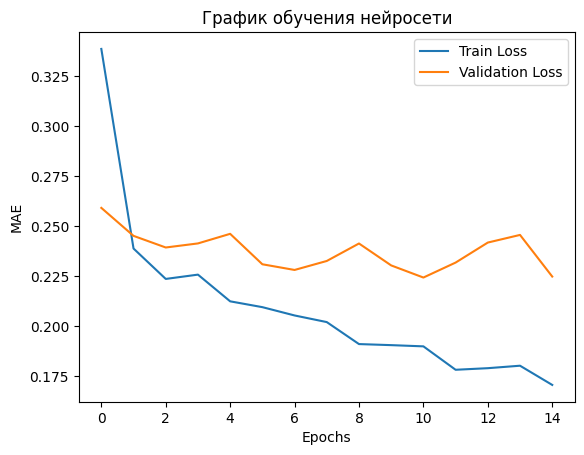

In [ ]:

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)  # Выходной слой для регрессии
])

# Компиляция модели
model.compile(optimizer='adam', loss=['mae'])

# Обучение модели с измененным количеством эпох и batch_size
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=8, verbose=1)

# Оценка модели
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# График обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('График обучения нейросети')
plt.show()

In [ ]:
# Применение для XGBoost
mae_orig_xgb, y_test_orig_xgb, y_pred_orig_xgb = inverse_mae(y_test, y_pred_xgb, scaler)
print(f"XGBoost MAE в долларах: {mae_orig_xgb:.2f}")

# Применение для нейросети
mae_orig_nn, y_test_orig_nn, y_pred_orig_nn = inverse_mae(y_test, predictions, scaler)
print(f"Нейросеть MAE в долларах: {mae_orig_nn:.2f}")

XGBoost MAE в долларах: 17148.05
Нейросеть MAE в долларах: 17850.04


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │        12,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,125 (270.02 KB)

 Trainable params: 23,041 (90.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 46,084 (180.02 KB)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.4569 - val_loss: 0.2777
Epoch 2/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2465 - val_loss: 0.2540
Epoch 3/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2153 - val_loss: 0.2447
Epoch 4/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2171 - val_loss: 0.2897
Epoch 5/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2316 - val_loss: 0.2355
Epoch 6/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1985 - val_loss: 0.2506
Epoch 7/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1925 - val_loss: 0.2237
Epoch 8/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1863 - val_loss: 0.2334
Epoch 9/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2026 - val_loss: 0.2296
Epoch 10/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1763 - val_loss: 0.2440
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Absolute Error: 0.24


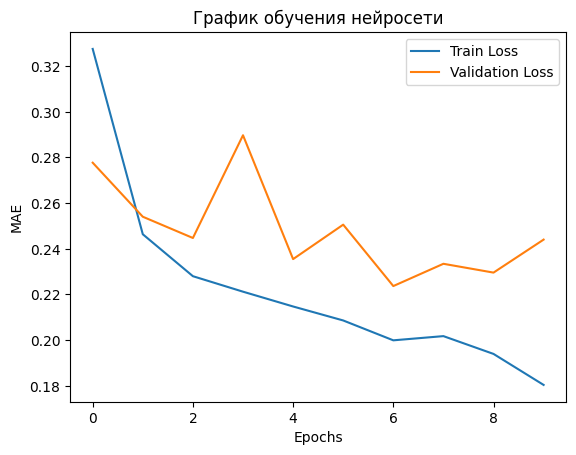

In [ ]:
# Создание второй модели нейросети
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)  # Выходной слой для регрессии
])

# Компиляция модели
model.compile(optimizer='adam', loss=['mae'])

# Обучение модели с измененным количеством эпох и batch_size
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=8, verbose=1)

# Оценка модели
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# График обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('График обучения нейросети')
plt.show()

In [ ]:
# Применение для XGBoost
mae_orig_xgb, y_test_orig_xgb, y_pred_orig_xgb = inverse_mae(y_test, y_pred_xgb, scaler)
print(f"XGBoost MAE в долларах: {mae_orig_xgb:.2f}")

# Применение для нейросети
mae_orig_nn, y_test_orig_nn, y_pred_orig_nn = inverse_mae(y_test, predictions, scaler)
print(f"Нейросеть MAE в долларах: {mae_orig_nn:.2f}")

XGBoost MAE в долларах: 17148.05
Нейросеть MAE в долларах: 19378.39


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3766 - val_loss: 0.2566
Epoch 2/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.2426 - val_loss: 0.2596
Epoch 3/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.2385 - val_loss: 0.2339
Epoch 4/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2169 - val_loss: 0.2354
Epoch 5/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1926 - val_loss: 0.2316
Epoch 6/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2125 - val_loss: 0.2314
Epoch 7/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2232 - val_loss: 0.2398
Epoch 8/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1926 - val_loss: 0.2173
Epoch 9/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1770 - val_loss: 0.3037
Epoch 10/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1976 - val_loss: 0.2472
Epoch 11/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1733 - val_loss: 0.2322
Epoch 12/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 

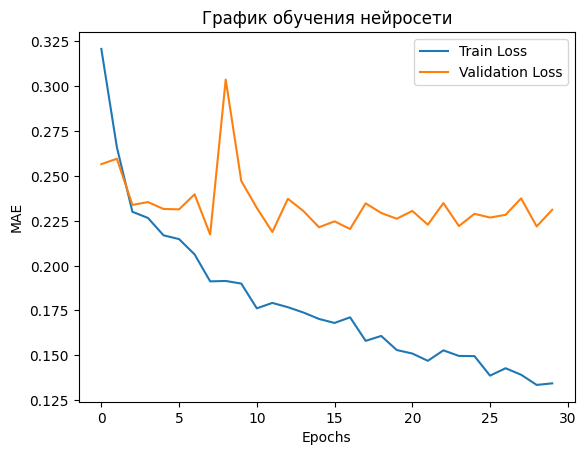

In [ ]:
# Создание третьей модели нейросети
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)  # Выходной слой для регрессии
])

# Компиляция модели
model.compile(optimizer='adam', loss=['mae'])

# Обучение модели с измененным количеством эпох и batch_size
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=8, verbose=1)

# Оценка модели
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# График обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('График обучения нейросети')
plt.show()

In [ ]:
# Применение для XGBoost
mae_orig_xgb, y_test_orig_xgb, y_pred_orig_xgb = inverse_mae(y_test, y_pred_xgb, scaler)
print(f"XGBoost MAE в долларах: {mae_orig_xgb:.2f}")

# Применение для нейросети
mae_orig_nn, y_test_orig_nn, y_pred_orig_nn = inverse_mae(y_test, predictions, scaler)
print(f"Нейросеть MAE в долларах: {mae_orig_nn:.2f}")

XGBoost MAE в долларах: 17148.05
Нейросеть MAE в долларах: 18358.03


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.4508 - val_loss: 0.2533
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2608 - val_loss: 0.2802
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2355 - val_loss: 0.2773
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2484 - val_loss: 0.2551
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2173 - val_loss: 0.2493
Epoch 6/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2209 - val_loss: 0.2369
Epoch 7/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1969 - val_loss: 0.2440
Epoch 8/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2057 - val_loss: 0.2689
Epoch 9/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1851 - val_loss: 0.2575
Epoch 10/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1885 - val_loss: 0.2340
Epoch 11/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1860 - val_loss: 0.2600
Epoch 12/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1968 - val_loss: 0.2441

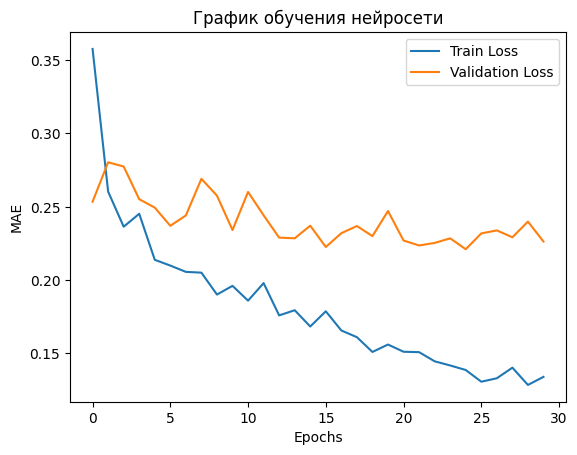

In [ ]:
# Создание 4й модели нейросети
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)  # Выходной слой для регрессии
])

# Компиляция модели
model.compile(optimizer='adam', loss=['mae'])

# Обучение модели с измененным количеством эпох и batch_size
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=16, verbose=1)

# Оценка модели
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# График обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('График обучения нейросети')
plt.show()

In [ ]:
# Применение для XGBoost
mae_orig_xgb, y_test_orig_xgb, y_pred_orig_xgb = inverse_mae(y_test, y_pred_xgb, scaler)
print(f"XGBoost MAE в долларах: {mae_orig_xgb:.2f}")

# Применение для нейросети
mae_orig_nn, y_test_orig_nn, y_pred_orig_nn = inverse_mae(y_test, predictions, scaler)
print(f"Нейросеть MAE в долларах: {mae_orig_nn:.2f}")

XGBoost MAE в долларах: 17148.05
Нейросеть MAE в долларах: 17965.01


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3570 - val_loss: 0.2432
Epoch 2/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2670 - val_loss: 0.3093
Epoch 3/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2322 - val_loss: 0.2730
Epoch 4/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2331 - val_loss: 0.2432
Epoch 5/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2172 - val_loss: 0.2476
Epoch 6/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2122 - val_loss: 0.2610
Epoch 7/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2035 - val_loss: 0.2270
Epoch 8/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1913 - val_loss: 0.2413
Epoch 9/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1873 - val_loss: 0.2317
Epoch 10/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1946 - val_loss: 0.2771
Epoch 11/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1702 - val_loss: 0.2437
Epoch 12/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.

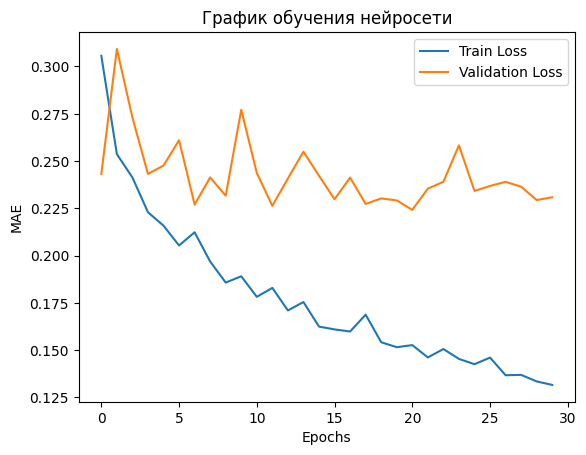

In [ ]:
# Создание пятой модели нейросети
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)  # Выходной слой для регрессии
])

# Компиляция модели
model.compile(optimizer='adam', loss=['mae'])

# Обучение модели с измененным количеством эпох и batch_size
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=8, verbose=1)

# Оценка модели
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# График обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('График обучения нейросети')
plt.show()

In [ ]:
# Применение для XGBoost
mae_orig_xgb, y_test_orig_xgb, y_pred_orig_xgb = inverse_mae(y_test, y_pred_xgb, scaler)
print(f"XGBoost MAE в долларах: {mae_orig_xgb:.2f}")

# Применение для нейросети
mae_orig_nn, y_test_orig_nn, y_pred_orig_nn = inverse_mae(y_test, predictions, scaler)
print(f"Нейросеть MAE в долларах: {mae_orig_nn:.2f}")

XGBoost MAE в долларах: 17148.05
Нейросеть MAE в долларах: 18331.08


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4824 - val_loss: 0.2588
Epoch 2/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2323 - val_loss: 0.2353
Epoch 3/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2386 - val_loss: 0.2862
Epoch 4/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2124 - val_loss: 0.2637
Epoch 5/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2150 - val_loss: 0.2331
Epoch 6/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2184 - val_loss: 0.2405
Epoch 7/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1921 - val_loss: 0.2316
Epoch 8/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1836 - val_loss: 0.2251
Epoch 9/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1848 - val_loss: 0.2614
Epoch 10/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1896 - val_loss: 0.2398
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Absolute Error: 0.24


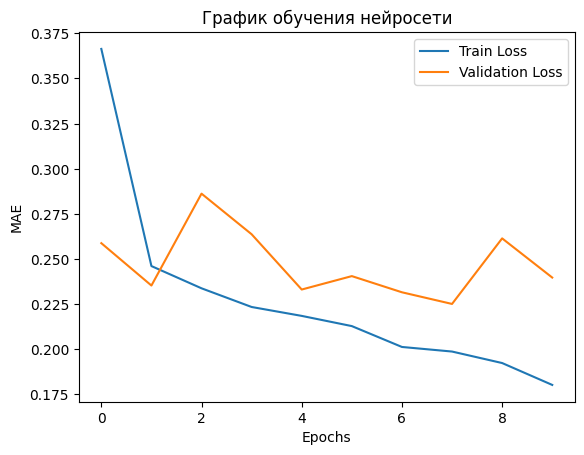

In [ ]:
# Создание шестой модели нейросети
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)  # Выходной слой для регрессии
])

# Компиляция модели
model.compile(optimizer='adam', loss=['mae'])

# Обучение модели с измененным количеством эпох и batch_size
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=8, verbose=1)

# Оценка модели
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# График обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('График обучения нейросети')
plt.show()

In [ ]:
# Применение для XGBoost
mae_orig_xgb, y_test_orig_xgb, y_pred_orig_xgb = inverse_mae(y_test, y_pred_xgb, scaler)
print(f"XGBoost MAE в долларах: {mae_orig_xgb:.2f}")

# Применение для нейросети
mae_orig_nn, y_test_orig_nn, y_pred_orig_nn = inverse_mae(y_test, predictions, scaler)
print(f"Нейросеть MAE в долларах: {mae_orig_nn:.2f}")

XGBoost MAE в долларах: 17148.05
Нейросеть MAE в долларах: 19039.93


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.4390 - val_loss: 0.2530
Epoch 2/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2426 - val_loss: 0.3204
Epoch 3/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2353 - val_loss: 0.2667
Epoch 4/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2339 - val_loss: 0.2364
Epoch 5/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2125 - val_loss: 0.2454
Epoch 6/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2041 - val_loss: 0.2254
Epoch 7/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1868 - val_loss: 0.2273
Epoch 8/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2260 - val_loss: 0.2407
Epoch 9/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2045 - val_loss: 0.2261
Epoch 10/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2075 - val_loss: 0.2289
Epoch 11/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1839 - val_loss: 0.2354
Epoch 12/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0

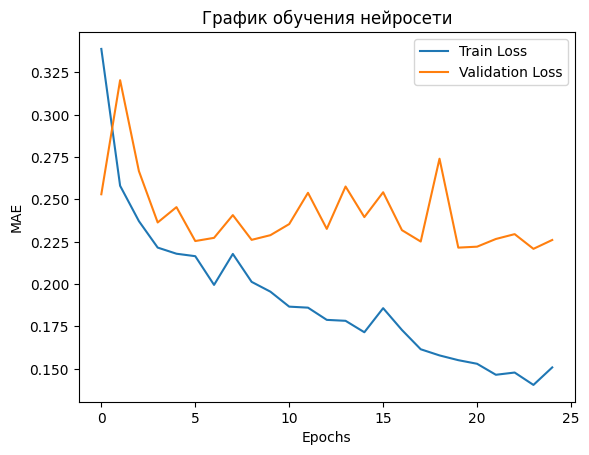

In [ ]:
# Создание седьмой модели нейросети
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)  # Выходной слой для регрессии
])

# Компиляция модели
model.compile(optimizer='adam', loss=['mae'])

# Обучение модели с измененным количеством эпох и batch_size
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=8, verbose=1)

# Оценка модели
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# График обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('График обучения нейросети')
plt.show()

In [ ]:
# Применение для XGBoost
mae_orig_xgb, y_test_orig_xgb, y_pred_orig_xgb = inverse_mae(y_test, y_pred_xgb, scaler)
print(f"XGBoost MAE в долларах: {mae_orig_xgb:.2f}")

# Применение для нейросети
mae_orig_nn, y_test_orig_nn, y_pred_orig_nn = inverse_mae(y_test, predictions, scaler)
print(f"Нейросеть MAE в долларах: {mae_orig_nn:.2f}")

XGBoost MAE в долларах: 17148.05
Нейросеть MAE в долларах: 17949.02


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4050 - val_loss: 0.2887
Epoch 2/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2614 - val_loss: 0.2312
Epoch 3/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2127 - val_loss: 0.2306
Epoch 4/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2283 - val_loss: 0.2304
Epoch 5/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2092 - val_loss: 0.2617
Epoch 6/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2071 - val_loss: 0.2452
Epoch 7/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1949 - val_loss: 0.2228
Epoch 8/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1925 - val_loss: 0.2283
Epoch 9/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1768 - val_loss: 0.2364
Epoch 10/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1799 - val_loss: 0.2537
Epoch 11/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2023 - val_loss: 0.2595
Epoch 12/30
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.

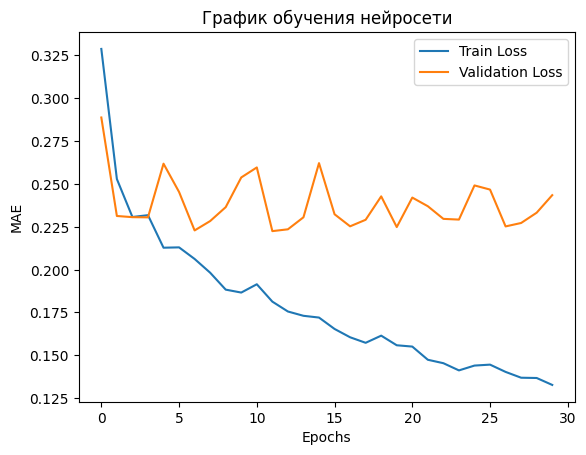

In [ ]:
# Создание восьмой модели нейросети
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)  # Выходной слой для регрессии
])

# Компиляция модели
model.compile(optimizer='adam', loss=['mae'])

# Обучение модели с измененным количеством эпох и batch_size
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=8, verbose=1)

# Оценка модели
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# График обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('График обучения нейросети')
plt.show()

In [ ]:
# Применение для XGBoost
mae_orig_xgb, y_test_orig_xgb, y_pred_orig_xgb = inverse_mae(y_test, y_pred_xgb, scaler)
print(f"XGBoost MAE в долларах: {mae_orig_xgb:.2f}")

# Применение для нейросети
mae_orig_nn, y_test_orig_nn, y_pred_orig_nn = inverse_mae(y_test, predictions, scaler)
print(f"Нейросеть MAE в долларах: {mae_orig_nn:.2f}")

XGBoost MAE в долларах: 17148.05
Нейросеть MAE в долларах: 19328.17


Добавим регуляризацию l2

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.8238 - mae: 0.4908 - val_loss: 0.6208 - val_mae: 0.3566
Epoch 2/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6065 - mae: 0.3509 - val_loss: 0.5236 - val_mae: 0.2913
Epoch 3/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5488 - mae: 0.3233 - val_loss: 0.4778 - val_mae: 0.2715
Epoch 4/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4646 - mae: 0.2642 - val_loss: 0.4623 - val_mae: 0.2784
Epoch 5/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4451 - mae: 0.2663 - val_loss: 0.4306 - val_mae: 0.2660
Epoch 6/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4085 - mae: 0.2484 - val_loss: 0.3912 - val_mae: 0.2427
Epoch 7/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4017 - mae: 0.2575 - val_loss: 0.3718 - val_mae: 0.2383
Epoch 8/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4113 - mae: 0.2810 - val_loss: 0.3767 - val_mae: 0.2551
Epoch 9/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3825

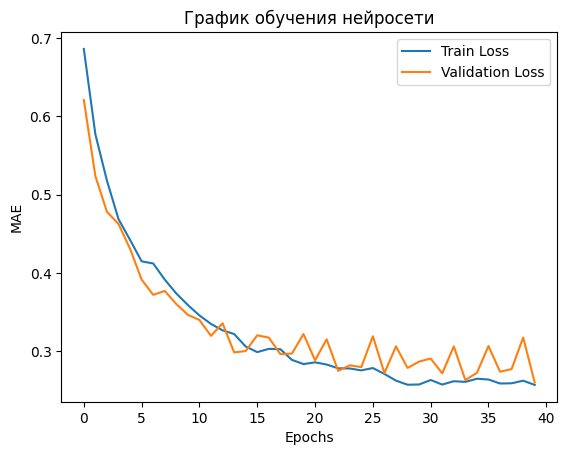

In [ ]:
# Создание девятой модели нейросети с регуляризацией l2
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],),
          kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Регрессия
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])

# Обучение модели с измененным количеством эпох и batch_size
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=8, verbose=1)

# Оценка модели
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# График обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('График обучения нейросети')
plt.show()

In [ ]:
# Применение для нейросети
mae_orig_nn, y_test_orig_nn, y_pred_orig_nn = inverse_mae(y_test, predictions, scaler)
print(f"Нейросеть MAE в долларах: {mae_orig_nn:.2f}")

Нейросеть MAE в долларах: 17507.88


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Средняя абсолютная ошибка: 0.22045981738534584 

Реальное значение:  -0.33  Предсказанное значение:  -0.51  Разница:   0.17
Реальное значение:   1.81  Предсказанное значение:   1.72  Разница:   0.09
Реальное значение:  -0.83  Предсказанное значение:  -0.95  Разница:   0.12
Реальное значение:  -0.28  Предсказанное значение:  -0.32  Разница:   0.04
Реальное значение:   1.69  Предсказанное значение:   1.37  Разница:   0.33


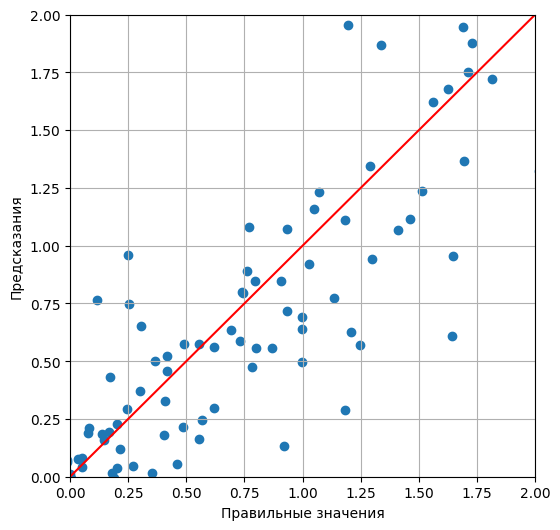

In [ ]:
eval_net(model, X_test, y_test)

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 256)            │        24,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,757 (792.02 KB)

 Trainable params: 67,585 (264.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 135,172 (528.02 KB)

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 21.8086 - mae: 0.5341 - val_loss: 1.4624 - val_mae: 0.3384
Epoch 2/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9746 - mae: 0.3490 - val_loss: 0.4811 - val_mae: 0.3399
Epoch 3/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5048 - mae: 0.3752 - val_loss: 0.4384 - val_mae: 0.3344
Epoch 4/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4580 - mae: 0.3511 - val_loss: 0.4232 - val_mae: 0.3226
Epoch 5/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4469 - mae: 0.3492 - val_loss: 0.4260 - val_mae: 0.3493
Epoch 6/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4500 - mae: 0.3676 - val_loss: 0.3933 - val_mae: 0.3063
Epoch 7/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4596 - mae: 0.3711 - val_loss: 0.4022 - val_mae: 0.3025
Epoch 8/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4341 - mae: 0.3392 - val_loss: 0.4021 - val_mae: 0.3234
Epoch 9/40
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4326

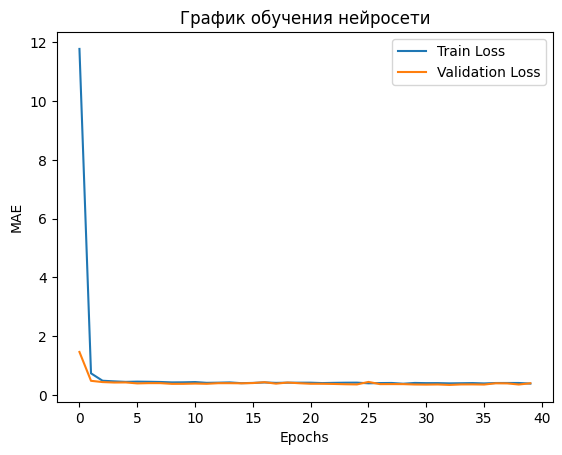

In [ ]:
# Создание девятой модели нейросети с регуляризацией l2

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.1)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.1)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Регрессия
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])

# Обучение модели с измененным количеством эпох и batch_size
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=8, verbose=1)

# Оценка модели
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# График обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('График обучения нейросети')
plt.show()

In [ ]:
# Применение для XGBoost
mae_orig_xgb, y_test_orig_xgb, y_pred_orig_xgb = inverse_mae(y_test, y_pred_xgb, scaler)
print(f"XGBoost MAE в долларах: {mae_orig_xgb:.2f}")

# Применение для нейросети
mae_orig_nn, y_test_orig_nn, y_pred_orig_nn = inverse_mae(y_test, predictions, scaler)
print(f"Нейросеть MAE в долларах: {mae_orig_nn:.2f}")

XGBoost MAE в долларах: 17148.05
Нейросеть MAE в долларах: 26884.85


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns

def eval_net(model, X, y_true):
    # Предсказания модели
    y_pred = model.predict(X).flatten()

    # Вывод метрик
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"MAE: {mae:.2f}")
    print(f"R^2: {r2:.2f}")

    # Распределение предсказаний и реальных значений
    plt.figure(figsize=(12, 5))

    # Диаграмма рассеяния: предсказания vs истинные значения
    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel("Истинные значения")
    plt.ylabel("Предсказания")
    plt.title("Предсказания vs Истинные значения")
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')

    # Распределение ошибок (гистограмма остатков)
    #errors = y_pred - y_true
    #plt.subplot(1, 2, 2)
    #sns.histplot(errors, bins=30, kde=True)
    #plt.xlabel("Ошибка предсказания")
    #plt.title("Распределение ошибок")

    plt.tight_layout()
    plt.show()

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAE: 0.33
R^2: 0.73


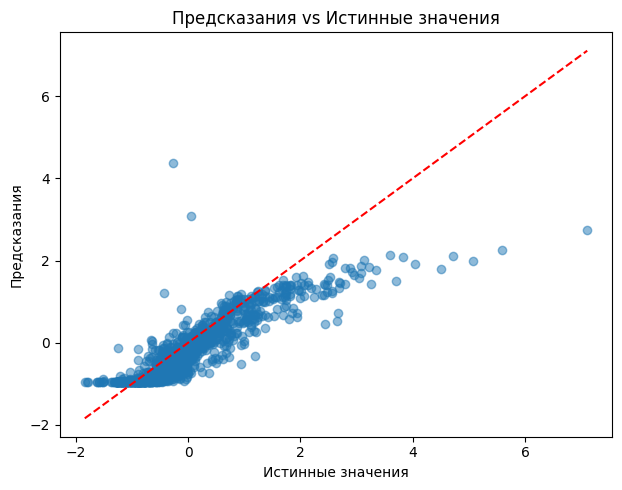

In [ ]:
eval_net(model, X_train, y_train)

Epoch 1/54


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.8316 - mae: 0.5034 - val_loss: 0.5606 - val_mae: 0.3124
Epoch 2/54
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5525 - mae: 0.3141 - val_loss: 0.4840 - val_mae: 0.2705
Epoch 3/54
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5071 - mae: 0.3010 - val_loss: 0.4250 - val_mae: 0.2392
Epoch 4/54
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4615 - mae: 0.2815 - val_loss: 0.4758 - val_mae: 0.3127
Epoch 5/54
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4266 - mae: 0.2682 - val_loss: 0.3815 - val_mae: 0.2366
Epoch 6/54
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3950 - mae: 0.2544 - val_loss: 0.4327 - val_mae: 0.3037
Epoch 7/54
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3998 - mae: 0.2740 - val_loss: 0.4533 - val_mae: 0.3374
Epoch 8/54
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3802 - mae: 0.2668 - val_loss: 0.3731 - val_mae: 0.2684
Epoch 9/54
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3469 

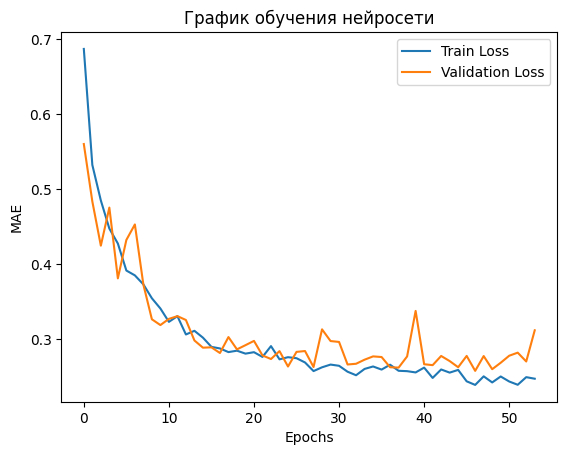

In [ ]:
# Создание десятой модели нейросети

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Регрессия
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])

# Обучение модели с измененным количеством эпох и batch_size
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=54, batch_size=8, verbose=1)

# Оценка модели
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# График обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('График обучения нейросети')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MAE: 0.28
R^2: 0.80


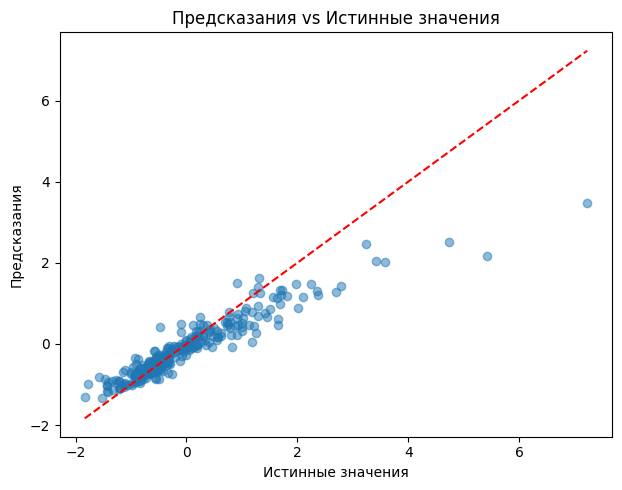

In [ ]:
eval_net(model, X_test, y_test)

In [ ]:
from sklearn.preprocessing import RobustScaler

# Создаем отдельные RobustScaler для признаков и целевой переменной
scaler_X = RobustScaler()
scaler_y = RobustScaler()

# Масштабируем признаки и целевую переменную
df_scaled_features = scaler_X.fit_transform(df[features])
df_scaled_target = scaler_y.fit_transform(df[[target]])

# Преобразуем в DataFrame для удобства
df_scaled_features_df = pd.DataFrame(df_scaled_features, columns=features, index=df.index)
df_one_hot_df = pd.DataFrame(df_one_hot, index=df.index)

# Объединяем признаки
df_features = pd.concat([df_one_hot_df, df_scaled_features_df], axis=1)

# Массивы для модели
X = df_features.to_numpy()
y = df_scaled_target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.losses import Huber

# Создание модели нейросети
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

# Компиляция модели с Huber loss
model.compile(optimizer='adam', loss=Huber(delta=1000.0))

# Обучение модели
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=8, verbose=1)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1488 - val_loss: 0.0771
Epoch 2/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0688 - val_loss: 0.0741
Epoch 3/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0544 - val_loss: 0.0733
Epoch 4/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0621 - val_loss: 0.0663
Epoch 5/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0509 - val_loss: 0.0799
Epoch 6/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0391 - val_loss: 0.0541
Epoch 7/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0409 - val_loss: 0.0619
Epoch 8/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0372 - val_loss: 0.0679
Epoch 9/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0308 - val_loss: 0.0695
Epoch 10/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0381 - val_loss: 0.0676
Epoch 11/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0403 - val_loss: 0.0558
Epoch 12/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

In [ ]:
# Предсказания
predictions = model.predict(X_test)

# Функция восстановления из нормализованных значений
def inverse_mae(y_true_scaled, y_pred_scaled, scaler_y):
    y_true_orig = scaler_y.inverse_transform(y_true_scaled.reshape(-1, 1))
    y_pred_orig = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
    mae_orig = mean_absolute_error(y_true_orig, y_pred_orig)
    return mae_orig, y_true_orig, y_pred_orig

# MAE в долларах
mae_orig_nn, y_test_orig_nn, y_pred_orig_nn = inverse_mae(y_test, predictions, scaler_y)
print(f"Нейросеть MAE в долларах: {mae_orig_nn:.2f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Нейросеть MAE в долларах: 19260.74


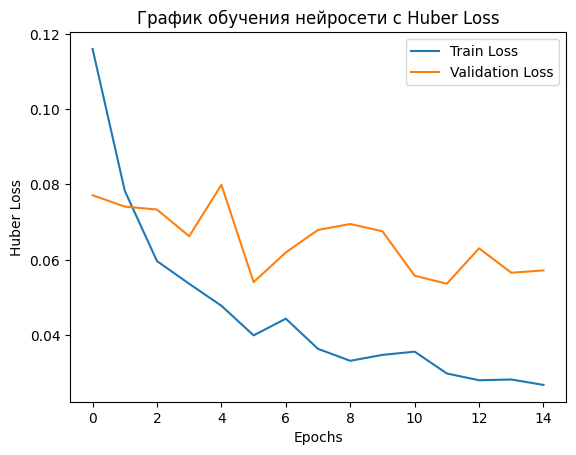

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Huber Loss')
plt.legend()
plt.title('График обучения нейросети с Huber Loss')
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MAE: 0.22
R^2: 0.90


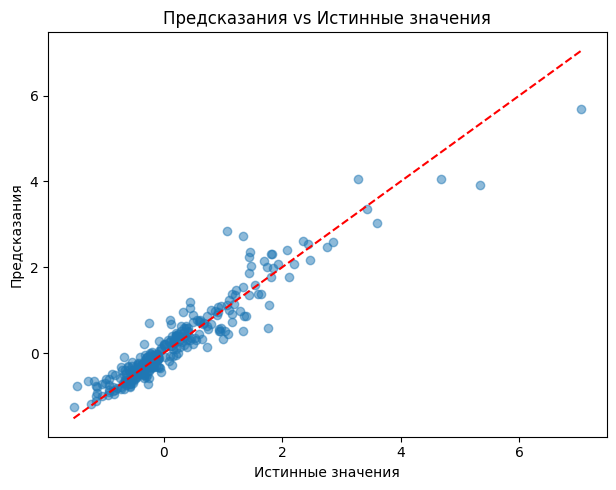

In [ ]:
eval_net(model, X_test, y_test)

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │         6,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,117 (102.02 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,412 (68.02 KB)

In [ ]:
# Создание двенадцатой модели нейросети
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)
])

# Компиляция модели с Huber loss
model.compile(optimizer='adam', loss=Huber(delta=200000.0))

# Обучение модели
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=8, verbose=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2575 - val_loss: 0.0848
Epoch 2/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0930 - val_loss: 0.0637
Epoch 3/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0430 - val_loss: 0.0963
Epoch 4/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0540 - val_loss: 0.0848
Epoch 5/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0470 - val_loss: 0.0621
Epoch 6/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0399 - val_loss: 0.0652
Epoch 7/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0475 - val_loss: 0.0666
Epoch 8/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0406 - val_loss: 0.0580
Epoch 9/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0286 - val_loss: 0.0580
Epoch 10/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0277 - val_loss: 0.0566
Epoch 11/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0284 - val_loss: 0.0566
Epoch 12/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

In [ ]:
# Предсказания
predictions = model.predict(X_test)

# Функция восстановления из нормализованных значений
def inverse_mae(y_true_scaled, y_pred_scaled, scaler_y):
    y_true_orig = scaler_y.inverse_transform(y_true_scaled.reshape(-1, 1))
    y_pred_orig = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
    mae_orig = mean_absolute_error(y_true_orig, y_pred_orig)
    return mae_orig, y_true_orig, y_pred_orig

# MAE в долларах
mae_orig_nn, y_test_orig_nn, y_pred_orig_nn = inverse_mae(y_test, predictions, scaler_y)
print(f"Нейросеть MAE в долларах: {mae_orig_nn:.2f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Нейросеть MAE в долларах: 17292.11


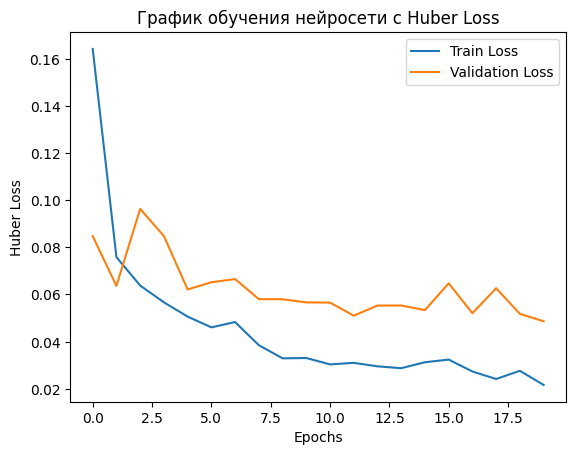

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Huber Loss')
plt.legend()
plt.title('График обучения нейросети с Huber Loss')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MAE: 0.21
R^2: 0.91


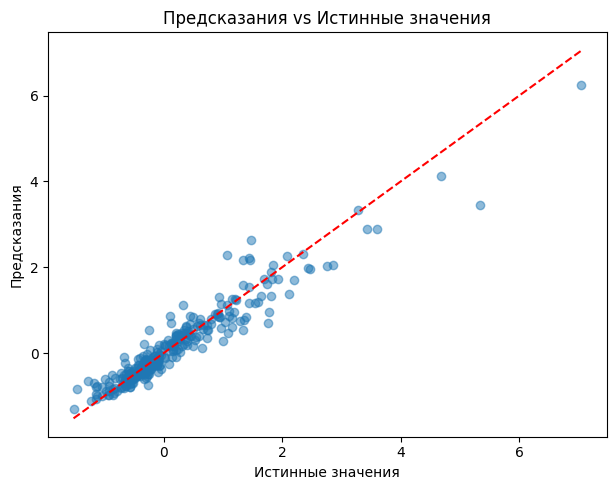

In [ ]:
eval_net(model, X_test, y_test)

In [ ]:
# Создание тринадцатой модели нейросети
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)
])

# Компиляция модели с Huber loss
model.compile(optimizer='adam', loss=Huber(delta=100.0))

# Обучение модели
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=8, verbose=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1706 - val_loss: 0.0829
Epoch 2/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0898 - val_loss: 0.0896
Epoch 3/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0616 - val_loss: 0.0807
Epoch 4/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0530 - val_loss: 0.0751
Epoch 5/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0446 - val_loss: 0.0905
Epoch 6/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0529 - val_loss: 0.0633
Epoch 7/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0353 - val_loss: 0.0793
Epoch 8/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0399 - val_loss: 0.0601
Epoch 9/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0314 - val_loss: 0.0573
Epoch 10/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0340 - val_loss: 0.0535
Epoch 11/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0355 - val_loss: 0.0537
Epoch 12/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

In [ ]:
# Предсказания
predictions = model.predict(X_test)

# Функция восстановления из нормализованных значений
def inverse_mae(y_true_scaled, y_pred_scaled, scaler_y):
    y_true_orig = scaler_y.inverse_transform(y_true_scaled.reshape(-1, 1))
    y_pred_orig = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
    mae_orig = mean_absolute_error(y_true_orig, y_pred_orig)
    return mae_orig, y_true_orig, y_pred_orig

# MAE в долларах
mae_orig_nn, y_test_orig_nn, y_pred_orig_nn = inverse_mae(y_test, predictions, scaler_y)
print(f"Нейросеть MAE в долларах: {mae_orig_nn:.2f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Нейросеть MAE в долларах: 18322.48


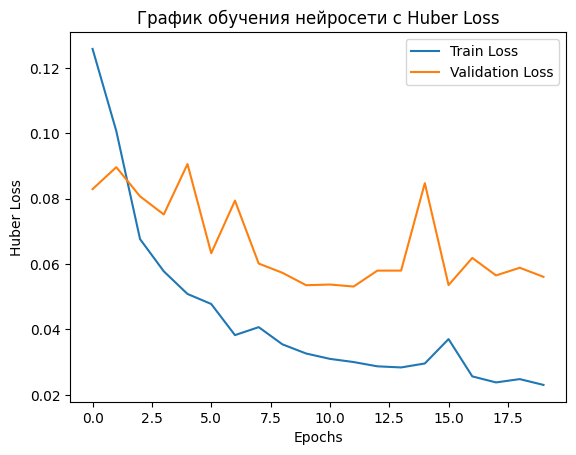

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Huber Loss')
plt.legend()
plt.title('График обучения нейросети с Huber Loss')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MAE: 0.22
R^2: 0.90


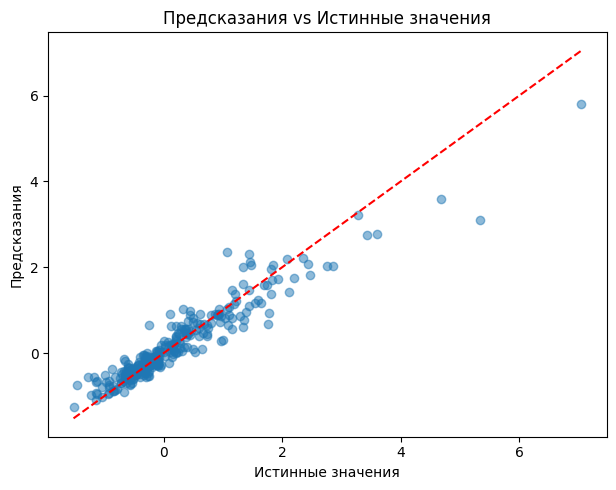

In [ ]:
eval_net(model, X_test, y_test)

In [ ]:
df['SalePrice'].min()

34900

In [ ]:
df['SalePrice'].max()

755000

In [ ]:
df['SalePrice'].mean()

np.float64(180921.19589041095)

In [ ]:
df['SalePrice'].median()

163000.0

Попробуем нейронную сеть Functional API со входами для числовых и категориальных переменных.

In [ ]:
column_names = [
    'Functional', 'OverallCond', 'OverallQual',
    'HouseStyle', 'BldgType', 'Condition1',
    'Neighborhood', 'Utilities', 'LandContour',
]

one_hot_encoded = []

for class_desc, column in zip(our_classes, column_names):
    mapping_dict = class_desc[1]
    num_classes = class_desc[0]

    # Преобразуем строковые значения в числа по словарю
    df[column + '_cat'] = df[column].map(mapping_dict)

    # Проверка на наличие NaN после преобразования
    if df[column + '_cat'].isnull().any():
        print(f"[!] Предупреждение: В колонке '{column}' есть значения, отсутствующие в словаре:")
        print(df.loc[df[column + '_cat'].isnull(), column].unique())

        # Обработка: можно либо удалить такие строки, либо заменить на 0
        # Здесь выберем замену на 0 (или другой класс, если разумно)
        df[column + '_cat'] = df[column + '_cat'].fillna(0).astype(int)
    else:
        df[column + '_cat'] = df[column + '_cat'].astype(int)

    # One-hot encoding
    encoded = to_categorical(df[column + '_cat'], num_classes=num_classes)
    encoded_df = pd.DataFrame(encoded, columns=[f"{column}_{i}" for i in range(num_classes)])
    one_hot_encoded.append(encoded_df)

[!] Предупреждение: В колонке 'OverallCond' есть значения, отсутствующие в словаре:
[5 8 6 7 4 2 3 9 1]
[!] Предупреждение: В колонке 'OverallQual' есть значения, отсутствующие в словаре:
[ 7  6  8  5  9  4 10  3  1  2]
[!] Предупреждение: В колонке 'HouseStyle' есть значения, отсутствующие в словаре:
['SLvl']
[!] Предупреждение: В колонке 'BldgType' есть значения, отсутствующие в словаре:
['2fmCon' 'Duplex' 'Twnhs']
[!] Предупреждение: В колонке 'Neighborhood' есть значения, отсутствующие в словаре:
['NAmes']
[!] Предупреждение: В колонке 'Utilities' есть значения, отсутствующие в словаре:
['AllPub' 'NoSeWa']
[!] Предупреждение: В колонке 'LandContour' есть значения, отсутствующие в словаре:
['Lvl' 'Bnk' 'Low' 'HLS']


Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.4767 - val_loss: 0.2652
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2876 - val_loss: 0.2448
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2661 - val_loss: 0.2596
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2349 - val_loss: 0.2497
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2200 - val_loss: 0.2217
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2308 - val_loss: 0.2441
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2174 - val_loss: 0.2252
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2115 - val_loss: 0.2489
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2061 - val_loss: 0.2206
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2039 - val_loss: 0.2283
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Mean Absolute Error (functional model): 0.23


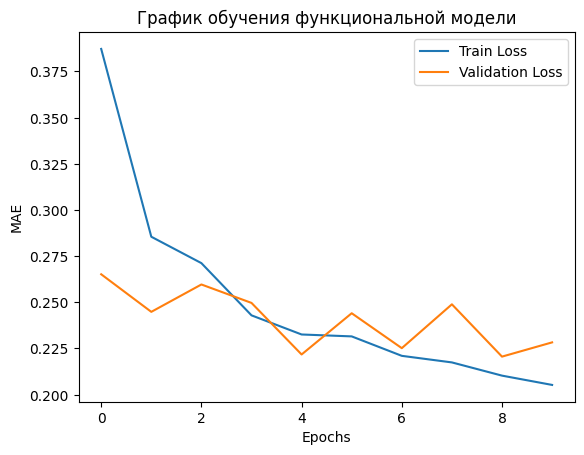

In [ ]:
# Размерности входов
num_numeric_features = df_scaled_features_df.shape[1]
num_categorical_features = df_one_hot.shape[1]

# Вход для числовых признаков
input_numeric = Input(shape=(num_numeric_features,), name='numeric_input')
x_numeric = Dense(64, activation='relu')(input_numeric)
x_numeric = Dense(32, activation='relu')(x_numeric)

# Вход для категориальных признаков (One-Hot)
input_categorical = Input(shape=(num_categorical_features,), name='categorical_input')
x_categorical = Dense(128, activation='relu')(input_categorical)
x_categorical = Dense(64, activation='relu')(x_categorical)

# Объединение двух потоков
combined = Concatenate()([x_numeric, x_categorical])
x = Dense(64, activation='relu')(combined)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
output = Dense(1)(x)  # Выходной слой (регрессия)

# Финальная модель
model = Model(inputs=[input_numeric, input_categorical], outputs=output)

# Компиляция
model.compile(optimizer='adam', loss='mae')

# Разделение X_train и X_test на числовые и категориальные части
X_numeric_train = X_train[:, -num_numeric_features:]
X_categorical_train = X_train[:, :num_categorical_features]

X_numeric_test = X_test[:, -num_numeric_features:]
X_categorical_test = X_test[:, :num_categorical_features]

# Обучение модели
history = model.fit(
    [X_numeric_train, X_categorical_train], y_train,
    validation_data=([X_numeric_test, X_categorical_test], y_test),
    epochs=10, batch_size=16, verbose=1
)

# Оценка
predictions = model.predict([X_numeric_test, X_categorical_test])
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (functional model): {mae:.2f}")

# График обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('График обучения функциональной модели')
plt.show()


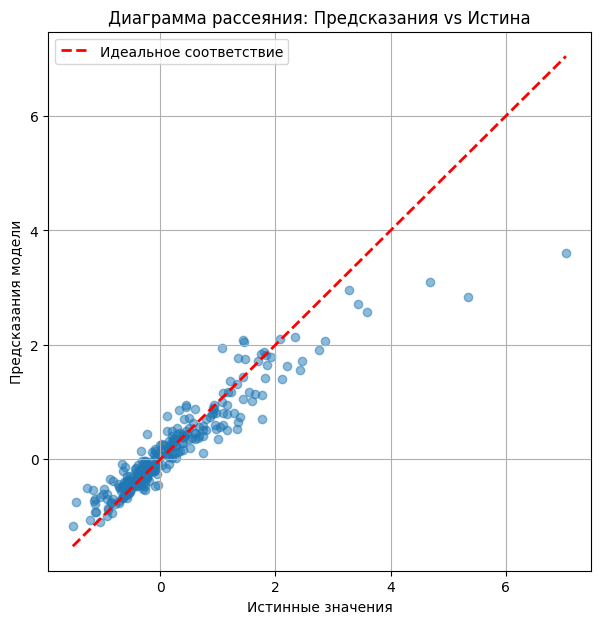

In [ ]:
# Убедимся, что предсказания одномерные
y_pred = predictions.flatten()

# Диаграмма рассеяния: предсказание vs. истина
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Идеальное соответствие')

plt.xlabel('Истинные значения')
plt.ylabel('Предсказания модели')
plt.title('Диаграмма рассеяния: Предсказания vs Истина')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

from tensorflow.keras.layers import LeakyReLU, concatenate
import random
import os

# 🔒 Фиксация random_state для повторяемости
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# Входы
input_numeric = Input(shape=(X_numeric_train.shape[1],), name='numeric_input')
input_categorical = Input(shape=(X_categorical_train.shape[1],), name='categorical_input')

# Поток числовых признаков
x_num = Dense(128)(input_numeric)
x_num = BatchNormalization()(x_num)
x_num = LeakyReLU()(x_num)

x_num = Dense(64)(x_num)
x_num = BatchNormalization()(x_num)
x_num = LeakyReLU()(x_num)

x_num = Dense(32)(x_num)
x_num = BatchNormalization()(x_num)
x_num = LeakyReLU()(x_num)

# Поток категориальных признаков
x_cat = Dense(128)(input_categorical)
x_cat = BatchNormalization()(x_cat)
x_cat = LeakyReLU()(x_cat)

x_cat = Dense(64)(x_cat)
x_cat = BatchNormalization()(x_cat)
x_cat = LeakyReLU()(x_cat)

x_cat = Dense(32)(x_cat)
x_cat = BatchNormalization()(x_cat)
x_cat = LeakyReLU()(x_cat)

# Объединение
x = concatenate([x_num, x_cat])
x = Dropout(0.3)(x)

# После объединения
x = Dense(64)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Dense(32)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

output = Dense(1, activation='linear')(x)

# Сборка модели
model = Model(inputs=[input_numeric, input_categorical], outputs=output)
model.compile(optimizer='adam', loss='huber', metrics=['mae'])

model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ numeric_input       │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ categorical_input   │ (None, 84)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 128)       │      1,408 │ numeric_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 128)       │     10,880 │ categorical_inpu… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128)       │        512 │ dense_25[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_28[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 128)       │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 128)       │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 64)        │      8,256 │ leaky_re_lu[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 64)        │      8,256 │ leaky_re_lu_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_26[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_29[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 64)        │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_4       │ (None, 64)        │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 32)        │      2,080 │ leaky_re_lu_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 32)        │      2,080 │ leaky_re_lu_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_27[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_30[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 32)        │          0 │ batch_normalizat

 Total params: 41,409 (161.75 KB)

 Trainable params: 40,321 (157.50 KB)

 Non-trainable params: 1,088 (4.25 KB)

Epoch 1/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.2464 - val_loss: 0.2416
Epoch 2/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2424 - val_loss: 0.2719
Epoch 3/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2483 - val_loss: 0.2518
Epoch 4/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2408 - val_loss: 0.2625
Epoch 5/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2404 - val_loss: 0.2504
Epoch 6/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2339 - val_loss: 0.2461
Epoch 7/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2379 - val_loss: 0.2474
Epoch 8/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2350 - val_loss: 0.2458
Epoch 9/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2296 - val_loss: 0.2534
Epoch 10/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2368 - val_loss: 0.2672
Epoch 11/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2330 - val_loss: 0.2635
Epoch 12/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2308 - val_

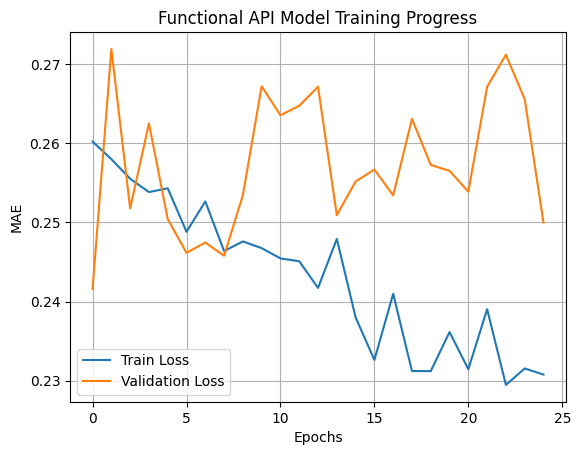

In [ ]:
# Создание модели
model_func = Model(inputs=[input_numeric, input_categorical], outputs=output)

# Компиляция
model_func.compile(optimizer='adam', loss='mae')

# Подготовим входные данные для двух потоков
X_numeric = df_scaled_features_df.to_numpy()
X_categorical = df_one_hot.to_numpy()

# Делим на обучение и тест
X_num_train, X_num_test, X_cat_train, X_cat_test, y_train_func, y_test_func = train_test_split(
    X_numeric, X_categorical, y, test_size=0.2, random_state=42
)

# Обучение модели
history_func = model_func.fit(
    {'numeric_input': X_num_train, 'categorical_input': X_cat_train},
    y_train_func,
    validation_data=(
        {'numeric_input': X_num_test, 'categorical_input': X_cat_test},
        y_test_func
    ),
    epochs=25,
    batch_size=16,
    verbose=1
)

# Оценка модели
pred_func = model_func.predict({'numeric_input': X_num_test, 'categorical_input': X_cat_test})
mae_func = mean_absolute_error(y_test_func, pred_func)
print(f"Functional API Model MAE: {mae_func:.2f}")

# График обучения
plt.plot(history_func.history['loss'], label='Train Loss')
plt.plot(history_func.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Functional API Model Training Progress')
plt.grid(True)
plt.show()


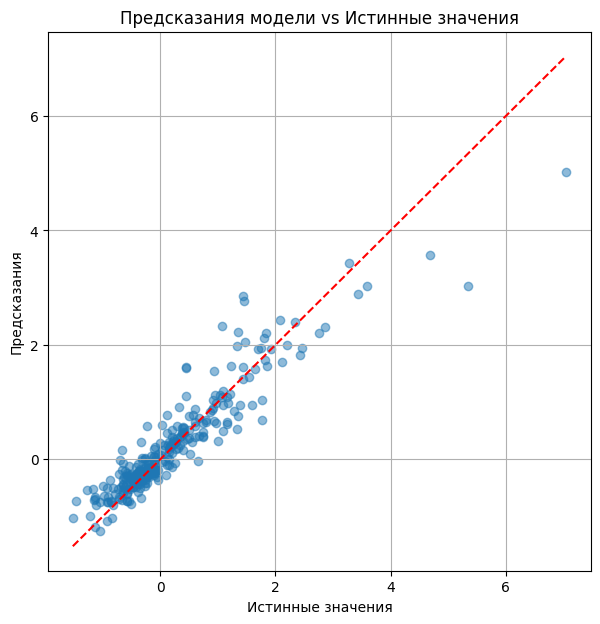

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test_func, pred_func, alpha=0.5)
plt.plot([y_test_func.min(), y_test_func.max()],
         [y_test_func.min(), y_test_func.max()], 'r--')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказания')
plt.title('Предсказания модели vs Истинные значения')
plt.grid(True)
plt.show()


In [ ]:
def inverse_target(scaled_values, scaler):
    """
    Восстанавливает исходные значения целевой переменной из масштабированных значений.

    Параметры:
    - scaled_values: np.ndarray или pd.Series — масштабированные значения.
    - scaler: объект скейлера (например, RobustScaler), использованный при масштабировании.

    Возвращает:
    - Восстановленные значения в исходном масштабе.
    """
    scaled_values = np.array(scaled_values).reshape(-1, 1)
    return scaler.inverse_transform(scaled_values).flatten()


In [ ]:
# Предсказания и истинные значения
y_test_original = inverse_target(y_test_func, scaler)
pred_original = inverse_target(pred_func, scaler)

# MAE в долларах
mae_original = mean_absolute_error(y_test_original, pred_original)
print(f"MAE (в долларах): {mae_original:.2f}")


MAE (в долларах): 19851.26


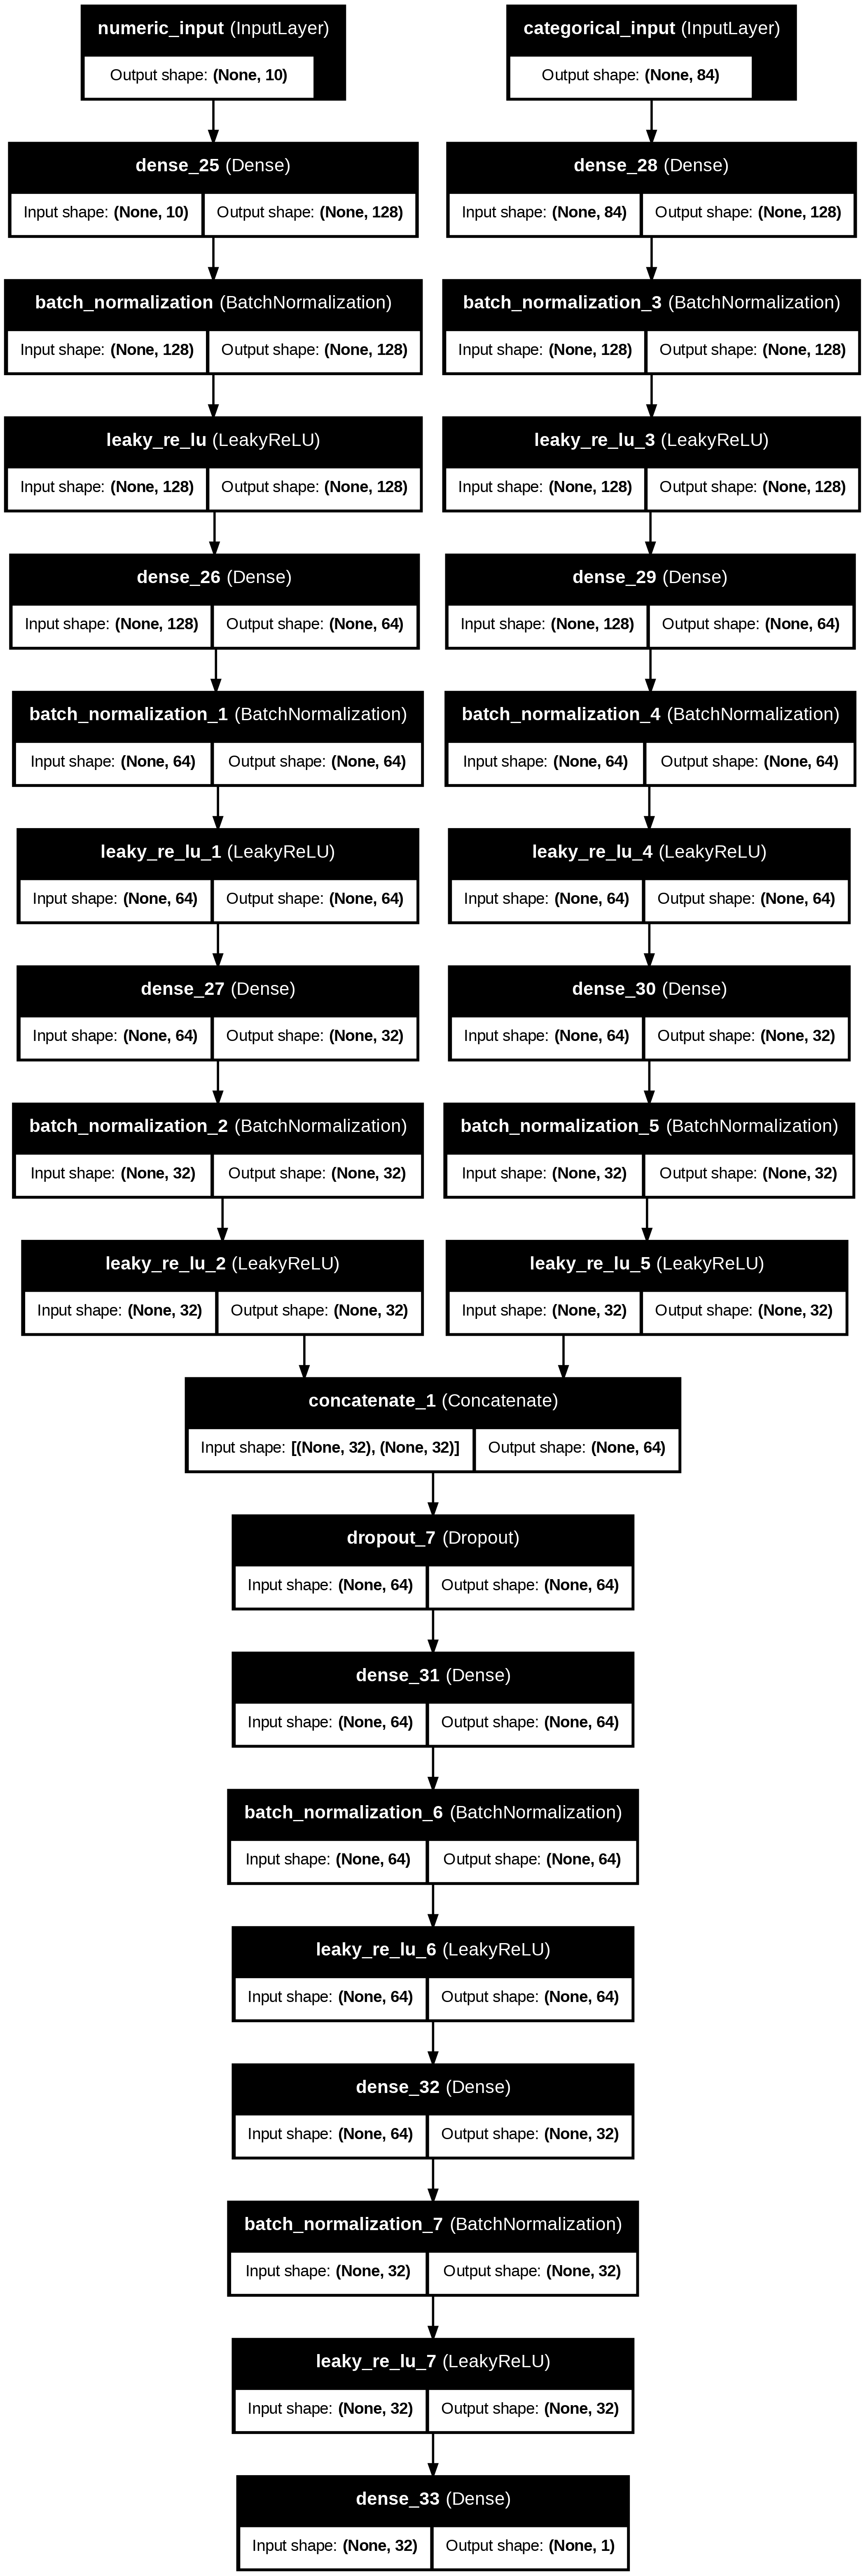

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_func, show_shapes=True, show_layer_names=True, to_file='model.png')

В ходе эксперимента была проведена серия сравнений между классическими алгоритмами машинного обучения (XGBoost, Random Forest) и нейронными сетями, построенными с использованием Tensorflow/Keras.
При решении задачи регрессии на датасете Ames Housing (с масштабированием числовых признаков и one-hot кодированием категориальных) нейронные сети показали MAE, худшее в лучшем случае на 4–5%, чем у XGBoost.

При этом построение нейросети требует существенно больше шагов: настройки архитектуры, выбора функции потерь, регуляризации, контроля переобучения, и зачастую приводит к пробам и ошибкам.
В отличие от этого, XGBoost и Random Forest обеспечивают стабильное качество с минимальной настройкой, особенно на табличных данных.

Вывод: классические модели ML — особенно XGBoost — остаются эффективным и оправданным решением для задач линейной регрессии, и преждевременно списывать их со счёта не стоит.
Но попробуем провести еще небольшую серию экспериментов с моделями, обернутыми в функции.

In [ ]:
!pip install gdown
import gdown

# Работа с массивами данных
import numpy as np

# Работа с табличными данными
import pandas as pd

import tensorflow as tf
from tensorflow import keras

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, Concatenate, concatenate
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Масштабирование данных
from sklearn.preprocessing import StandardScaler

# Разделение данных
from sklearn.model_selection import train_test_split

# MAE
from sklearn.metrics import mean_absolute_error

# Отрисовка графиков
import matplotlib.pyplot as plt
import seaborn as sns

# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, r2_score

# Импорт xgboost
from xgboost import XGBRegressor


%matplotlib inline

In [ ]:
def load_data_from_gdrive(id='1-QnB6EPbDpqWQHx2q_w6Va4wVqGpmCZj'):
    pd.set_option('display.max_columns', None)  # Показывать все столбцы
    gdown.download(id=id, output='train.csv', quiet=False)
    df = pd.read_csv('train.csv')
    print(df.head())
    return df

df = load_data_from_gdrive()

Downloading...
From: https://drive.google.com/uc?id=1-QnB6EPbDpqWQHx2q_w6Va4wVqGpmCZj
To: /content/train.csv
100%|██████████| 461k/461k [00:00<00:00, 64.6MB/s]

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

Столбец SalePrice выступает целевой переменной.

Остальные столбцы признаками.

Определим их влияние. Вывелем десять столбцов с наибольшей корреляцией.

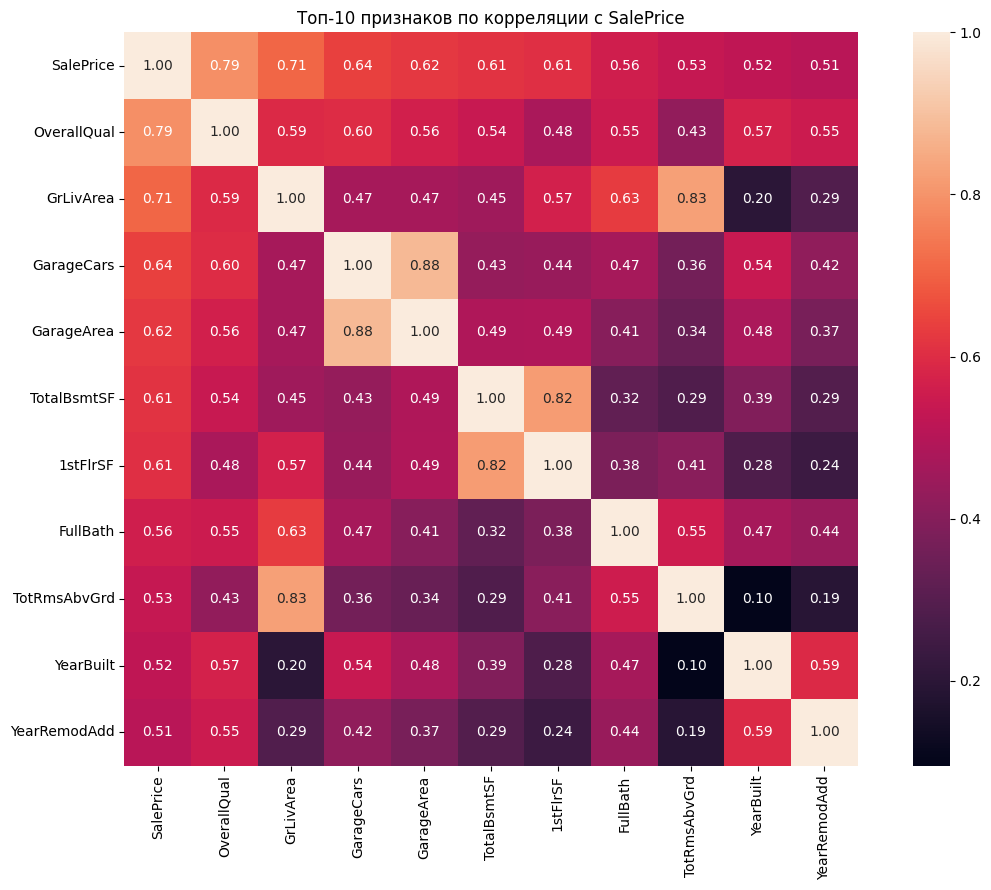

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [ ]:
def plot_corr_top_10(df=None, target='SalePrice'):
    """
    Строит тепловую карту топ-10 признаков с наибольшей корреляцией с целевой переменной
    и возвращает список этих признаков.

    Параметры:
    - df: DataFrame, по умолчанию используется глобальный df.
    - target: Название целевой переменной (по умолчанию 'SalePrice').

    Возвращает:
    - corrmat_top_10: Index объектов — топ-10 признаков + target.
    """
    # Если df не передан — использовать глобальный df
    if df is None:
        try:
            df = globals()['df']
        except KeyError:
            raise ValueError("Датафрейм не передан и глобальный df не найден.")

    # Матрица корреляций
    corrmat = df.corr(numeric_only=True)

    # Топ-10 признаков + целевая переменная
    corrmat_top_10 = corrmat.nlargest(11, target)[target].index
    cm = np.corrcoef(df[corrmat_top_10].values.T)

    # Визуализация
    plt.figure(figsize=(12, 9))
    sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 10},
                yticklabels=corrmat_top_10.values,
                xticklabels=corrmat_top_10.values)
    plt.title(f'Топ-10 признаков по корреляции с {target}')
    plt.tight_layout()
    plt.show()

    return corrmat_top_10


plot_corr_top_10()            # использует глобальный df
# plot_corr_top_10(df=my_df)   # использует переданный датафрейм

Построим модели с существующими признауами в XGBoost и NN

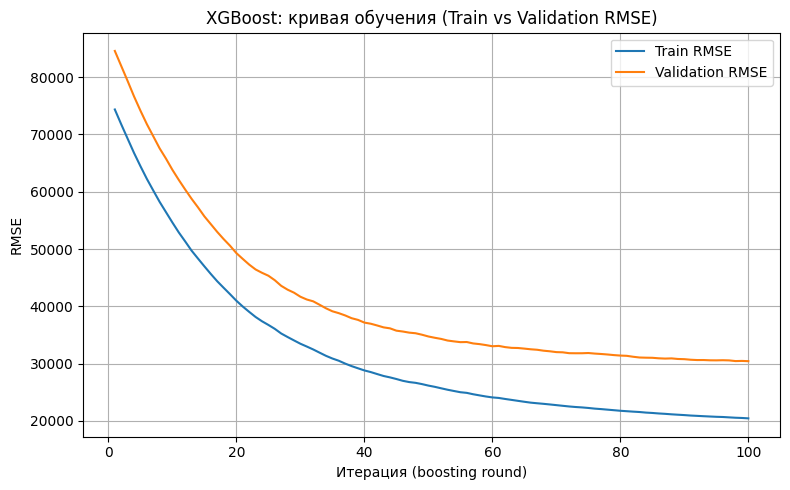

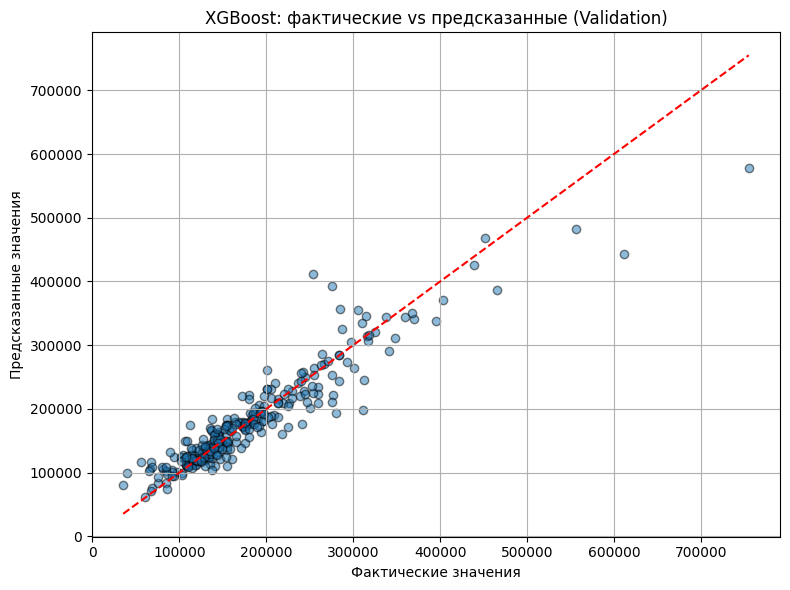

MAE  (Mean Absolute Error)            : 18845.97
MSE  (Mean Squared Error)             : 926207168.00
RMSE (Root Mean Squared Error)        : 30433.65
R²   (R-squared)                      : 0.8792
MAPE (Mean Absolute Percentage Error) : 11.67%


In [ ]:
def evaluate_xgboost(df, test_size=0.2, random_state=42):
    # Признаки и целевая переменная
    features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
                'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
                'YearBuilt', 'YearRemodAdd']
    target = 'SalePrice'

    X = df[features]
    y = df[target]

    # Разбиваем на train и validation
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Модель XGBoost с eval_metric='rmse'
    model = XGBRegressor(
        random_state=42,
        n_estimators=100,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='rmse'
    )

    # Передаём и train, и validation в eval_set
    model.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        verbose=False
    )

    # Получаем историю RMSE на train и validation
    results   = model.evals_result()
    train_rmse = results['validation_0']['rmse']
    val_rmse   = results['validation_1']['rmse']
    epochs     = range(1, len(train_rmse) + 1)

    # График обучения (RMSE по итерациям для train и validation)
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_rmse, label='Train RMSE')
    plt.plot(epochs, val_rmse,   label='Validation RMSE')
    plt.xlabel("Итерация (boosting round)")
    plt.ylabel("RMSE")
    plt.title("XGBoost: кривая обучения (Train vs Validation RMSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Предсказания на validation
    y_pred = model.predict(X_val)

    # Метрики на validation
    mae  = mean_absolute_error(y_val, y_pred)
    mse  = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_val, y_pred)
    mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100

    # График "фактические vs предсказанные" на validation
    plt.figure(figsize=(8, 6))
    plt.scatter(y_val, y_pred, alpha=0.5, edgecolors='k')
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
    plt.xlabel("Фактические значения")
    plt.ylabel("Предсказанные значения")
    plt.title("XGBoost: фактические vs предсказанные (Validation)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Печать метрик
    print(f"MAE  (Mean Absolute Error)            : {mae:.2f}")
    print(f"MSE  (Mean Squared Error)             : {mse:.2f}")
    print(f"RMSE (Root Mean Squared Error)        : {rmse:.2f}")
    print(f"R²   (R-squared)                      : {r2:.4f}")
    print(f"MAPE (Mean Absolute Percentage Error) : {mape:.2f}%")

evaluate_xgboost(df)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
MAE (Mean Absolute Error): 22494.27
MSE (Mean Squared Error): 1343778816.00
RMSE (Root Mean Squared Error): 36657.59
R² (R-squared): 0.8248
MAPE (Mean Absolute Percentage Error): 13.89%


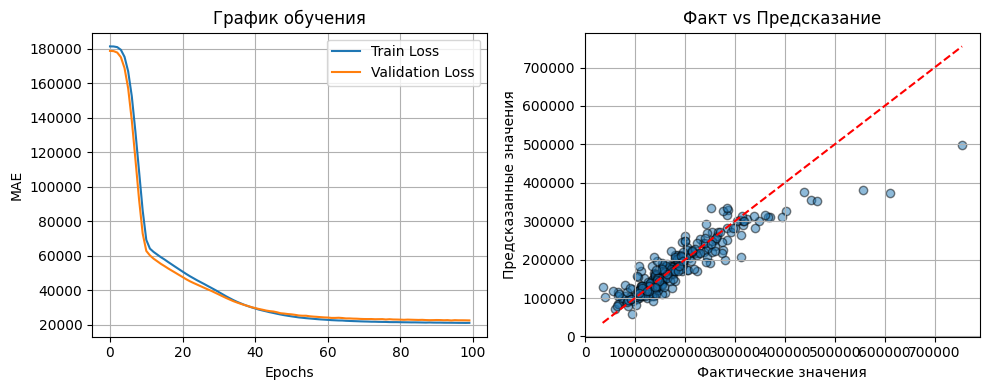

In [ ]:
def evaluate_nn(df):
    # Признаки и целевая переменная
    features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
                'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
                'YearBuilt', 'YearRemodAdd']
    target = 'SalePrice'

    X = df[features]
    y = df[target]

    # Разделение на train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    # Масштабирование
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Модель
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mae', metrics=['mae'])



    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_test_scaled, y_test),
        epochs=100, batch_size=16, verbose=0
    )

    # Предсказания
    predictions = model.predict(X_test_scaled).flatten()

    # Метрики
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    # Вывод метрик
    print(f"MAE (Mean Absolute Error): {mae:.2f}")
    print(f"MSE (Mean Squared Error): {mse:.2f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
    print(f"R² (R-squared): {r2:.4f}")
    print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

    # График обучения
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.title('График обучения')
    plt.legend()
    plt.grid(True)

    # График: Фактические vs Предсказанные значения
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, predictions, alpha=0.5, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Фактические значения')
    plt.ylabel('Предсказанные значения')
    plt.title('Факт vs Предсказание')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

evaluate_nn(df)

Первичный эксперимент внезапно показал несколько большую точность классического ML. Необходимы дополнительные эксперименты.

Введем нрвые аеременные, преобразованные из порядковых в векторный вид.

In [ ]:
def prepare_ml_data(df):
    our_classes = [
        [0, {'Typ': 0, 'Min1': 1, 'Min2': 2, 'Mod': 3, 'Maj1': 4, 'Maj2': 5, 'Sev': 6, 'Sal': 7}],
        [0, {'10 Very Excellent': 0, '9  Excellent': 1, '8  Very Good': 2, '7  Good': 3, '6  Above Average': 4,
             '5  Average': 5, '4  Below Average': 6, '3  Fair': 7, '2  Poor': 8, '1  Very Poor': 9}],
        [0, {'10 Very Excellent': 0, '9  Excellent': 1, '8  Very Good': 2, '7  Good': 3, '6  Above Average': 4,
             '5  Average': 5, '4  Below Average': 6, '3  Fair': 7, '2  Poor': 8, '1  Very Poor': 9}],
        [0, {'1Story': 0, '1.5Fin': 1, '1.5Unf': 2, '2Story': 3, '2.5Fin': 4, '2.5Unf': 5, 'SFoyer': 6, 'SLvl	Split Level': 7}],
        [0, {'1Fam': 0, '2FmCon': 1, 'Duplx': 2, 'TwnhsE': 3, 'TwnhsI': 4, '2.5Unf': 5}],
        [0, {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRNn': 3, 'RRAn': 4, 'PosN': 5, 'PosA': 6, 'RRNe': 7, 'RRAe': 8}],
        [0, {'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5, 'Crawfor': 6, 'Edwards': 7,
             'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'Names': 12, 'NoRidge': 13, 'NPkVill': 14,
             'NridgHt': 15, 'NWAmes': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 'SawyerW': 20, 'Somerst': 21,
             'StoneBr': 22, 'Timber': 23, 'Veenker': 24}],
        [0, {'Gtl': 0, 'Mod': 1, 'Sev': 2}],
        [0, {'Inside': 0, 'Corner': 1, 'CulDSac': 2, 'FR2': 3, 'FR3': 4}],
        [0, {'AllPub': 0, 'NoSewr': 1, 'NoSeWa': 2, 'ELO': 3}],
        [0, {'Lvl': 0, 'Bnk': 1, 'HLS': 2, 'Low': 3}],
        [0, {'10 Very Excellent': 0, '9  Excellent': 1, '8  Very Good': 2, '7  Good': 3, '6  Above Average': 4,
             '5  Average': 5, '4  Below Average': 6, '3  Fair': 7, '2  Poor': 8, '1  Very Poor': 9}],
    ]

    column_names = [
        'Functional', 'OverallCond', 'OverallQual', 'HouseStyle',
        'BldgType', 'Condition1', 'Neighborhood', 'LandSlope',
        'LotConfig', 'Utilities', 'LandContour'
    ]

    for class_desc in our_classes:
        class_desc[0] = max(class_desc[1].values()) + 1

    one_hot_encoded = []
    for class_desc, column in zip(our_classes, column_names):
        mapping_dict = class_desc[1]
        num_classes = class_desc[0]

        df[column + '_cat'] = df[column].map(mapping_dict).fillna(0).astype(int)
        encoded = to_categorical(df[column + '_cat'], num_classes=num_classes)
        encoded_df = pd.DataFrame(encoded, columns=[f"{column}_{i}" for i in range(num_classes)], index=df.index)
        one_hot_encoded.append(encoded_df)

    df_one_hot = pd.concat(one_hot_encoded, axis=1)

    # Числовые признаки и целевая переменная
    features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
                'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
                'YearBuilt', 'YearRemodAdd']
    target = 'SalePrice'

    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    df_scaled_features = scaler_X.fit_transform(df[features])
    df_scaled_target = scaler_y.fit_transform(df[[target]])

    df_scaled_features_df = pd.DataFrame(df_scaled_features, columns=features, index=df.index)
    df_features = pd.concat([df_one_hot, df_scaled_features_df], axis=1)

    X = df_features.to_numpy()
    y = df_scaled_target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, scaler_X, scaler_y

X_train, X_test, y_train, y_test, scaler_X, scaler_y = prepare_ml_data(df)

MAE : 17170.25
MSE : 690000498.51
RMSE: 26267.86
R²  : 0.9100
MAPE: 10.82%


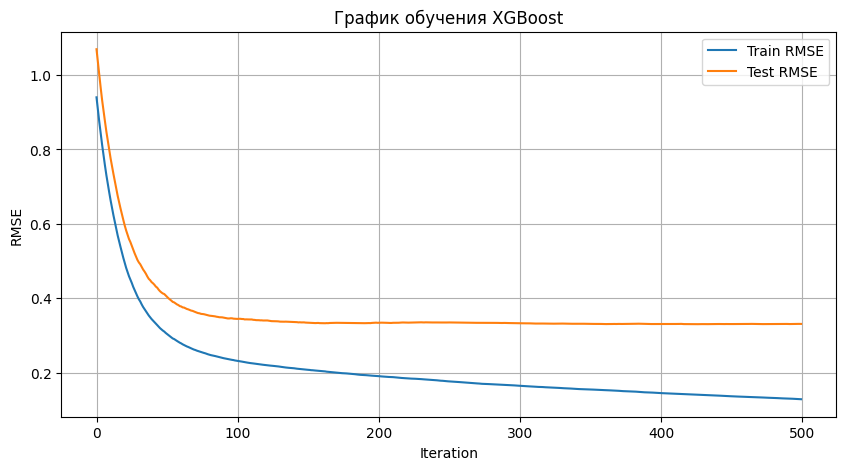

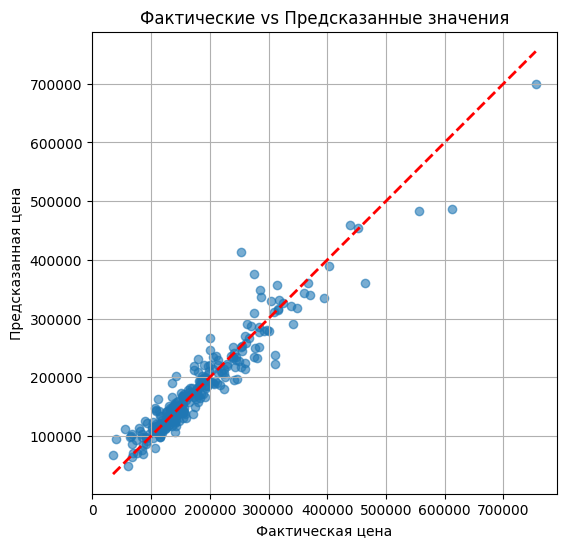

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

def train_xgboost(X_train, X_test, y_train, y_test, scaler_X, scaler_y):
    # Передаём eval_metric прямо в конструктор
    model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric="rmse"
    )

    # Список для валидации
    eval_set = [(X_train, y_train), (X_test, y_test)]
    # Вызываем fit без eval_metric, но с eval_set
    model.fit(
        X_train,
        y_train,
        eval_set=eval_set,
        verbose=False
    )

    # Предсказания (масштабированные)
    y_pred_scaled = model.predict(X_test).reshape(-1, 1)
    y_test_scaled = y_test.reshape(-1, 1)

    # Обратное преобразование масштабирования
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test_scaled)

    # Вычисляем метрики
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.4f}")
    print(f"MAPE: {mape:.2f}%")

    # График обучения
    results = model.evals_result()
    plt.figure(figsize=(10, 5))
    plt.plot(results['validation_0']['rmse'], label='Train RMSE')
    plt.plot(results['validation_1']['rmse'], label='Test RMSE')
    plt.xlabel('Iteration')
    plt.ylabel('RMSE')
    plt.title('График обучения XGBoost')
    plt.legend()
    plt.grid(True)
    plt.show()

    # График фактические vs предсказанные
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot(
        [y_true.min(), y_true.max()],
        [y_true.min(), y_true.max()],
        'r--', lw=2
    )
    plt.xlabel('Фактическая цена')
    plt.ylabel('Предсказанная цена')
    plt.title('Фактические vs Предсказанные значения')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    return model

model = train_xgboost(X_train, X_test, y_train, y_test, scaler_X, scaler_y)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3651 - mae: 0.3651 - val_loss: 0.2434 - val_mae: 0.2434
Epoch 2/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2250 - mae: 0.2250 - val_loss: 0.2734 - val_mae: 0.2734
Epoch 3/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2267 - mae: 0.2267 - val_loss: 0.2566 - val_mae: 0.2566
Epoch 4/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1975 - mae: 0.1975 - val_loss: 0.2414 - val_mae: 0.2414
Epoch 5/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1965 - mae: 0.1965 - val_loss: 0.2375 - val_mae: 0.2375
Epoch 6/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1904 - mae: 0.1904 - val_loss: 0.2426 - val_mae: 0.2426
Epoch 7/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1904 - mae: 0.1904 - val_loss: 0.2647 - val_mae: 0.2647
Epoch 8/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1930 - mae: 0.1930 - val_loss: 0.2444 - val_mae: 0.2444
Epoch 9/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss:

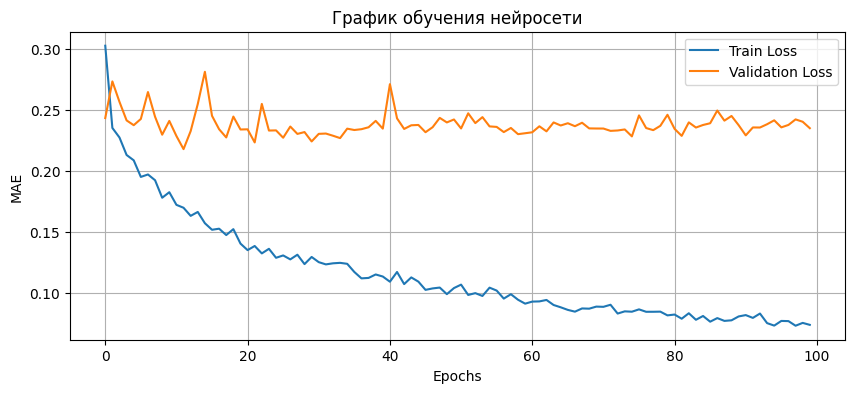

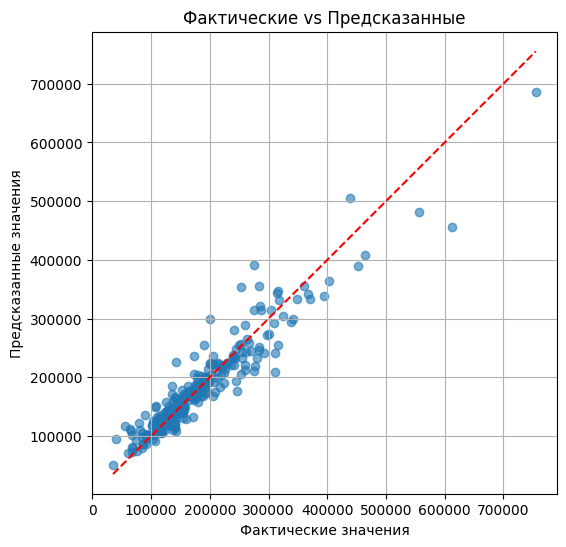

In [ ]:
def train_evaluate_nn(X_train, X_test, y_train, y_test, scaler_X=None, scaler_y=None):
    # Построение модели
    model = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1)
    ])

    # Компиляция модели
    model.compile(optimizer='adam', loss='mae', metrics=['mae'])

    # Обучение
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=8,
        verbose=1
    )

    # Предсказания
    y_pred = model.predict(X_test)

    # Обратное преобразование, если использовался scaler_y
    if scaler_y is not None:
        y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
        y_pred_inv = scaler_y.inverse_transform(y_pred).flatten()
    else:
        y_test_inv = y_test
        y_pred_inv = y_pred.flatten()

    # Метрики
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_inv, y_pred_inv)
    mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100

    print(f"MAE (Mean Absolute Error): {mae:.2f}")
    print(f"MSE (Mean Squared Error): {mse:.2f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
    print(f"R² (R-squared): {r2:.4f}")
    print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

    # График обучения
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.title('График обучения нейросети')
    plt.legend()
    plt.grid(True)
    plt.show()

    # График Фактические vs Предсказанные
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test_inv, y_pred_inv, alpha=0.6)
    plt.plot([y_test_inv.min(), y_test_inv.max()],
             [y_test_inv.min(), y_test_inv.max()],
             color='red', linestyle='--')
    plt.xlabel('Фактические значения')
    plt.ylabel('Предсказанные значения')
    plt.title('Фактические vs Предсказанные')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    return model
model = train_evaluate_nn(X_train, X_test, y_train, y_test, scaler_X, scaler_y)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3515 - mae: 0.3515 - val_loss: 0.2471 - val_mae: 0.2471
Epoch 2/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2371 - mae: 0.2371 - val_loss: 0.2327 - val_mae: 0.2327
Epoch 3/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2261 - mae: 0.2261 - val_loss: 0.2516 - val_mae: 0.2516
Epoch 4/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2084 - mae: 0.2084 - val_loss: 0.2343 - val_mae: 0.2343
Epoch 5/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1923 - mae: 0.1923 - val_loss: 0.2506 - val_mae: 0.2506
Epoch 6/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2008 - mae: 0.2008 - val_loss: 0.3086 - val_mae: 0.3086
Epoch 7/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2009 - mae: 0.2009 - val_loss: 0.2410 - val_mae: 0.2410
Epoch 8/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1951 - mae: 0.1951 - val_loss: 0.2502 - val_mae: 0.2502
Epoch 9/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1686 

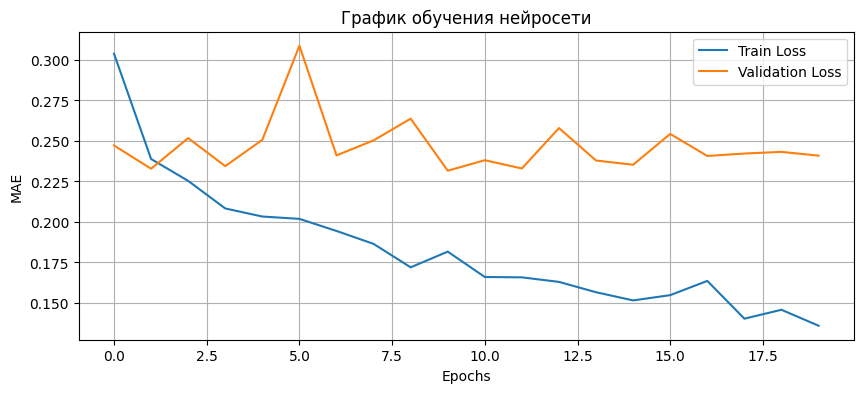

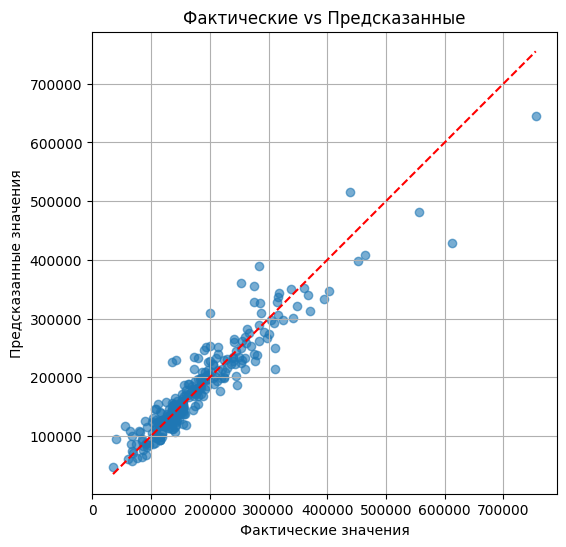

In [ ]:
def train_evaluate_nn(X_train, X_test, y_train, y_test, scaler_X=None, scaler_y=None):
    # Построение модели
    model = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1)
    ])

    # Компиляция модели
    model.compile(optimizer='adam', loss='mae', metrics=['mae'])

    # Обучение
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=20,
        batch_size=8,
        verbose=1
    )

    # Предсказания
    y_pred = model.predict(X_test)

    # Обратное преобразование, если использовался scaler_y
    if scaler_y is not None:
        y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
        y_pred_inv = scaler_y.inverse_transform(y_pred).flatten()
    else:
        y_test_inv = y_test
        y_pred_inv = y_pred.flatten()

    # Метрики
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_inv, y_pred_inv)
    mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100

    print(f"MAE (Mean Absolute Error): {mae:.2f}")
    print(f"MSE (Mean Squared Error): {mse:.2f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
    print(f"R² (R-squared): {r2:.4f}")
    print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

    # График обучения
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.title('График обучения нейросети')
    plt.legend()
    plt.grid(True)
    plt.show()

    # График Фактические vs Предсказанные
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test_inv, y_pred_inv, alpha=0.6)
    plt.plot([y_test_inv.min(), y_test_inv.max()],
             [y_test_inv.min(), y_test_inv.max()],
             color='red', linestyle='--')
    plt.xlabel('Фактические значения')
    plt.ylabel('Предсказанные значения')
    plt.title('Фактические vs Предсказанные')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    return model

model = train_evaluate_nn(X_train, X_test, y_train, y_test, scaler_X, scaler_y)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.7781 - mae: 0.4397 - val_loss: 0.5556 - val_mae: 0.2873
Epoch 2/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5903 - mae: 0.3314 - val_loss: 0.5021 - val_mae: 0.2689
Epoch 3/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5285 - mae: 0.3025 - val_loss: 0.4640 - val_mae: 0.2590
Epoch 4/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4766 - mae: 0.2778 - val_loss: 0.4553 - val_mae: 0.2741
Epoch 5/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4422 - mae: 0.2663 - val_loss: 0.4928 - val_mae: 0.3314
Epoch 6/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4193 - mae: 0.2619 - val_loss: 0.3949 - val_mae: 0.2499
Epoch 7/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3998 - mae: 0.2584 - val_loss: 0.4030 - val_mae: 0.2723
Epoch 8/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3718 - mae: 0.2444 - val_loss: 0.3670 - val_mae: 0.2488
Epoch 9/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss:

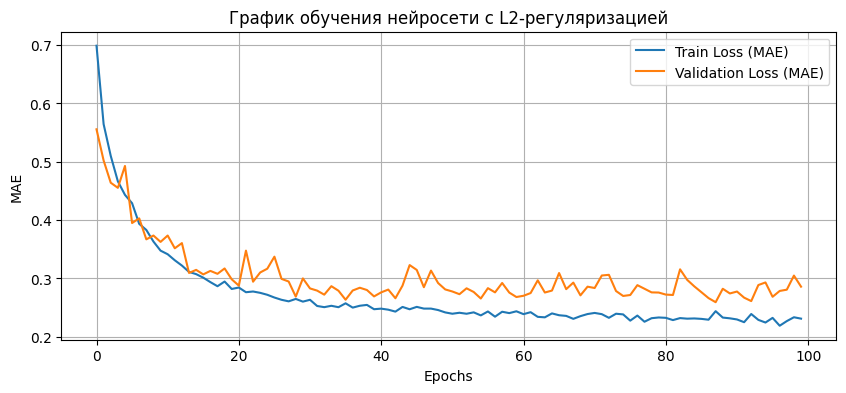

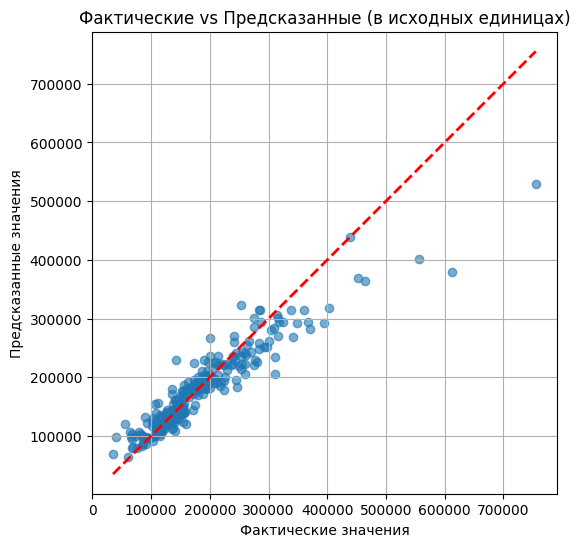

In [ ]:
# Добавим регуляризацию l2 для уменьшения влияния выбросов.

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

def train_evaluate_nn_l2(
    X_train, X_test, y_train, y_test,
    scaler_X=None, scaler_y=None,
    l2_strength=0.001,
    dropout_rates=(0.3, 0.3, 0.2),
    learning_rate=0.001,
    epochs=20,
    batch_size=8
):
    """
    Строит, обучает и оценивает нейросеть с L2-регуляризацией + Dropout.
    Вход:
      - X_train, X_test, y_train, y_test: массивы (масштабированные, если есть scaler_Y)
      - scaler_X (необязательно): для обратного преобразования X (не используется здесь)
      - scaler_y (необязательно): scaler для y, чтобы вернуть предсказания к исходному масштабу
      - l2_strength: коэффициент L2-регуляризации (по умолчанию 0.001)
      - dropout_rates: кортеж из трёх значений для Dropout-слоёв
      - learning_rate: шаг обучения для Adam
      - epochs, batch_size: параметры обучения
    Выход:
      - обученная модель (возвращается из функции)
      - внутри функции печатаются:
          MAE, MSE, RMSE, R², MAPE (в исходных единицах, если задан scaler_y)
      - отображаются два графика:
          1) Train/Validation Loss (MAE) по эпохам
          2) Фактические vs Предсказанные (в исходных единицах)
    """

    # Построим модель Sequential с L2-регуляризаторами и Dropout
    model = Sequential([
        Dense(
            256, activation='relu',
            input_shape=(X_train.shape[1],),
            kernel_regularizer=l2(l2_strength)
        ),
        Dropout(dropout_rates[0]),
        Dense(
            128, activation='relu',
            kernel_regularizer=l2(l2_strength)
        ),
        Dropout(dropout_rates[1]),
        Dense(
            64, activation='relu',
            kernel_regularizer=l2(l2_strength)
        ),
        Dropout(dropout_rates[2]),
        Dense(32, activation='relu'),
        Dense(1)  # Выходной слой для регрессии
    ])

    # Компилируем модель
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

    # Обучаем
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Делаем предсказания в масштабированном виде
    y_pred_scaled = model.predict(X_test).reshape(-1, 1)
    y_test_scaled  = y_test.reshape(-1, 1)

    # Если передан scaler_y, возвращаемся к исходным значениям цены
    if scaler_y is not None:
        y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()
        y_true = scaler_y.inverse_transform(y_test_scaled).flatten()
    else:
        # Если нет scaler_y, считаем, что y_test уже в оригинале
        y_pred = y_pred_scaled.flatten()
        y_true = y_test_scaled.flatten()

    # Рассчитаем метрики (в исходных единицах)
    mae  = mean_absolute_error(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"MAE (Mean Absolute Error): {mae:.2f}")
    print(f"MSE (Mean Squared Error): {mse:.2f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
    print(f"R² (R-squared): {r2:.4f}")
    print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

    # 1) График обучения (Train/Validation Loss по эпохам)
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Train Loss (MAE)')
    plt.plot(history.history['val_loss'], label='Validation Loss (MAE)')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.title('График обучения нейросети с L2-регуляризацией')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 2) График "Фактические vs Предсказанные"
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    plt.xlabel('Фактические значения')
    plt.ylabel('Предсказанные значения')
    plt.title('Фактические vs Предсказанные (в исходных единицах)')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    return model

model_l2 = train_evaluate_nn_l2(
    X_train, X_test, y_train, y_test,
    scaler_X=None,         # здесь не используется
    scaler_y=scaler_y,     # если вы масштабировали y через StandardScaler
    l2_strength=0.001,
    dropout_rates=(0.3, 0.3, 0.2),
    learning_rate=0.001,
    epochs=100,
    batch_size=8
)

Epoch 1/36


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.8021 - mae: 0.4665 - val_loss: 0.5549 - val_mae: 0.2936
Epoch 2/36
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5515 - mae: 0.3003 - val_loss: 0.4694 - val_mae: 0.2442
Epoch 3/36
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5182 - mae: 0.3002 - val_loss: 0.4581 - val_mae: 0.2609
Epoch 4/36
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4724 - mae: 0.2811 - val_loss: 0.4134 - val_mae: 0.2390
Epoch 5/36
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4315 - mae: 0.2623 - val_loss: 0.4063 - val_mae: 0.2515
Epoch 6/36
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4274 - mae: 0.2775 - val_loss: 0.3763 - val_mae: 0.2387
Epoch 7/36
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3808 - mae: 0.2468 - val_loss: 0.3917 - val_mae: 0.2680
Epoch 8/36
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3694 - mae: 0.2486 - val_loss: 0.3537 - val_mae: 0.2415
Epoch 9/36
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3524 

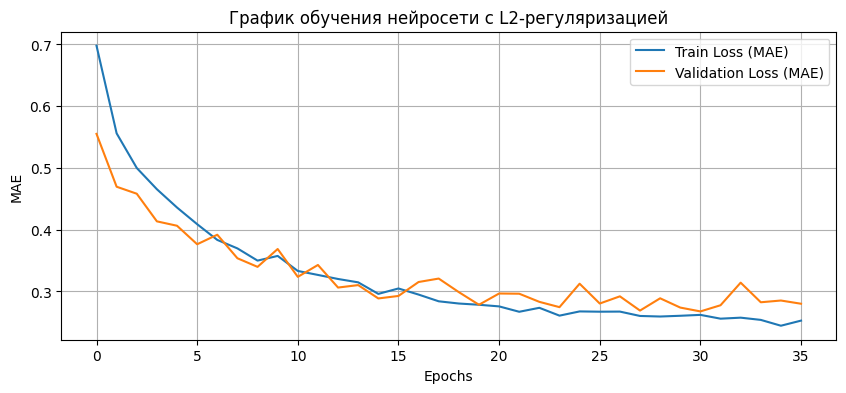

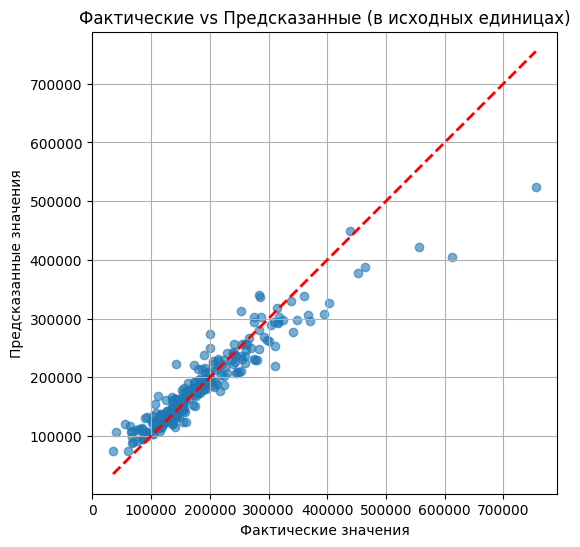

In [ ]:
model_l2 = train_evaluate_nn_l2(
    X_train, X_test, y_train, y_test,
    scaler_X=None,         # здесь не используется
    scaler_y=scaler_y,     # если вы масштабировали y через StandardScaler
    l2_strength=0.001,
    dropout_rates=(0.3, 0.3, 0.2),
    learning_rate=0.001,
    epochs=36,
    batch_size=8)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1752 - mae: 0.4004 - val_loss: 0.0988 - val_mae: 0.2756
Epoch 2/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0950 - mae: 0.2753 - val_loss: 0.0794 - val_mae: 0.2487
Epoch 3/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0635 - mae: 0.2202 - val_loss: 0.0751 - val_mae: 0.2464
Epoch 4/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0485 - mae: 0.2099 - val_loss: 0.1004 - val_mae: 0.2659
Epoch 5/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0524 - mae: 0.2127 - val_loss: 0.0713 - val_mae: 0.2412
Epoch 6/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0495 - mae: 0.2038 - val_loss: 0.0847 - val_mae: 0.2563
Epoch 7/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0448 - mae: 0.2003 - val_loss: 0.0775 - val_mae: 0.2525
Epoch 8/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0416 - mae: 0.1982 - val_loss: 0.0745 - val_mae: 0.2477
Epoch 9/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss:

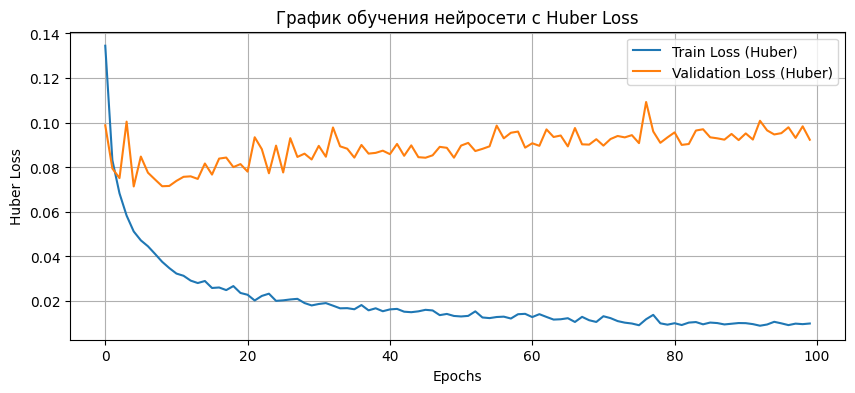

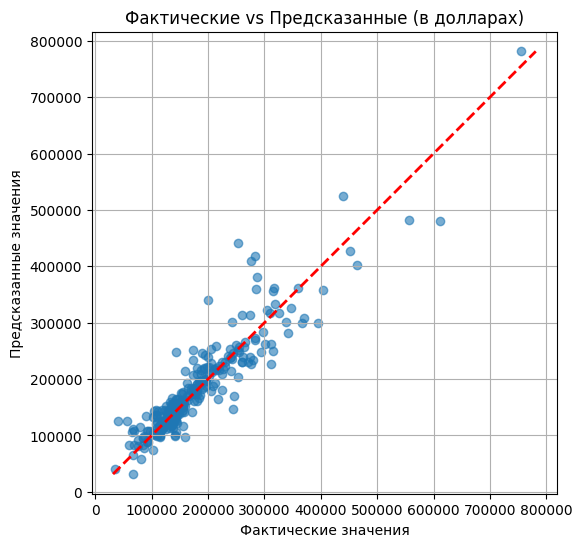

In [ ]:
def train_evaluate_huber(
    X_train, X_test, y_train, y_test,
    scaler_X, scaler_y,
    huber_delta=1000.0,
    learning_rate=0.001,
    epochs=100,
    batch_size=8
):
    """
    Единая функция, принимающая уже масштабированные X_train, X_test, y_train, y_test,
    а также RobustScaler'ы (scaler_X, scaler_y) для обратного преобразования y.
    Строит нейросеть с Huber loss, обучает её и выводит:
      – метрики (MAE, MSE, RMSE, R², MAPE) в исходных единицах (доллары);
      – график обучения (Train/Validation Loss);
      – график "Фактические vs Предсказанные".
    Возвращает: обученную модель.
    """

    # 1. Создаём модель
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])

    # 2. Компилируем с Huber loss
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=Huber(delta=huber_delta), metrics=['mae'])

    # 3. Обучаем модель
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # 4. Предсказания (в масштабированном виде)
    y_pred_scaled = model.predict(X_test).reshape(-1, 1)
    y_test_scaled = y_test.reshape(-1, 1)

    # 5. Обратное преобразование y через scaler_y
    y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()
    y_true = scaler_y.inverse_transform(y_test_scaled).flatten()

    # 6. Расчёт метрик в исходных единицах
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    # MAPE: вручную, чтобы избежать деления на ноль
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

    print(f"MAE  (Mean Absolute Error)            : {mae:.2f}")
    print(f"MSE  (Mean Squared Error)             : {mse:.2f}")
    print(f"RMSE (Root Mean Squared Error)        : {rmse:.2f}")
    print(f"R²   (R-squared)                      : {r2:.4f}")
    print(f"MAPE (Mean Absolute Percentage Error) : {mape:.2f}%")

    # 7. График обучения (Train/Validation Loss)
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'],   label='Train Loss (Huber)')
    plt.plot(history.history['val_loss'], label='Validation Loss (Huber)')
    plt.xlabel('Epochs')
    plt.ylabel('Huber Loss')
    plt.title('График обучения нейросети с Huber Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 8. График "Фактические vs Предсказанные"
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    mn = min(y_true.min(), y_pred.min())
    mx = max(y_true.max(), y_pred.max())
    plt.plot([mn, mx], [mn, mx], 'r--', lw=2)
    plt.xlabel('Фактические значения')
    plt.ylabel('Предсказанные значения')
    plt.title('Фактические vs Предсказанные (в долларах)')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    return model

model = train_evaluate_huber(
    X_train, X_test, y_train, y_test,
    scaler_X, scaler_y,
    huber_delta=1000.0,
    learning_rate=0.001,
    epochs=100,
    batch_size=8)

Epoch 1/12


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2304 - mae: 0.4321 - val_loss: 0.1119 - val_mae: 0.2682
Epoch 2/12
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0739 - mae: 0.2386 - val_loss: 0.1014 - val_mae: 0.2807
Epoch 3/12
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0513 - mae: 0.2179 - val_loss: 0.0953 - val_mae: 0.2517
Epoch 4/12
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0424 - mae: 0.1992 - val_loss: 0.0864 - val_mae: 0.2642
Epoch 5/12
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0434 - mae: 0.1993 - val_loss: 0.0925 - val_mae: 0.2641
Epoch 6/12
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0405 - mae: 0.1934 - val_loss: 0.0707 - val_mae: 0.2409
Epoch 7/12
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0357 - mae: 0.1942 - val_loss: 0.0693 - val_mae: 0.2410
Epoch 8/12
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0322 - mae: 0.1849 - val_loss: 0.0656 - val_mae: 0.2388
Epoch 9/12
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344 

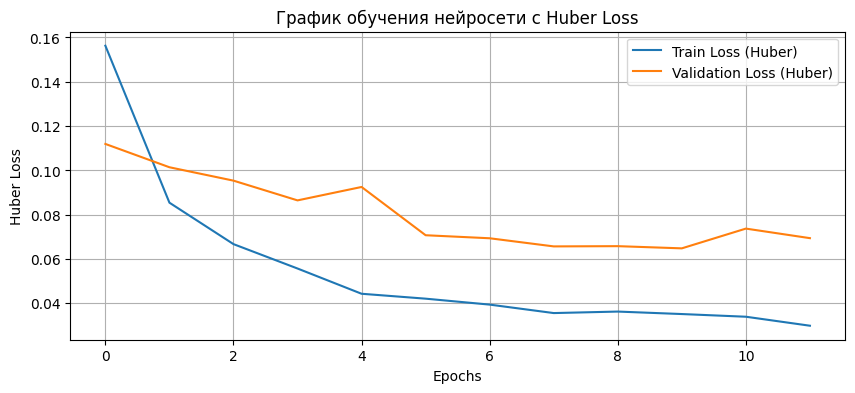

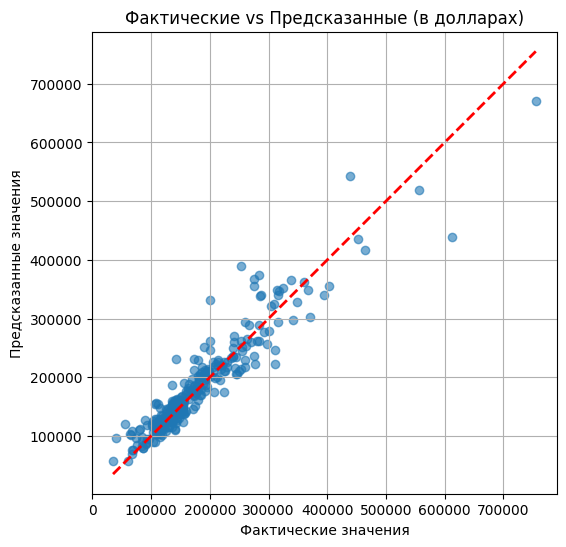

In [ ]:
model = train_evaluate_huber(
    X_train, X_test, y_train, y_test,
    scaler_X, scaler_y,
    huber_delta=1000.0,
    learning_rate=0.001,
    epochs=12,
    batch_size=8
)


Epoch 1/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4564 - mae: 0.4564 - val_loss: 0.2675 - val_mae: 0.2675
Epoch 2/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2837 - mae: 0.2837 - val_loss: 0.2545 - val_mae: 0.2545
Epoch 3/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2496 - mae: 0.2496 - val_loss: 0.2528 - val_mae: 0.2528
Epoch 4/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2520 - mae: 0.2520 - val_loss: 0.2495 - val_mae: 0.2495
Epoch 5/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2304 - mae: 0.2304 - val_loss: 0.2303 - val_mae: 0.2303
Epoch 6/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2228 - mae: 0.2228 - val_loss: 0.2435 - val_mae: 0.2435
Epoch 7/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2263 - mae: 0.2263 - val_loss: 0.2304 - val_mae: 0.2304
Epoch 8/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2296 - mae: 0.2296 - val_loss: 0.2497 - val_mae: 0.2497
Epoch 9/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

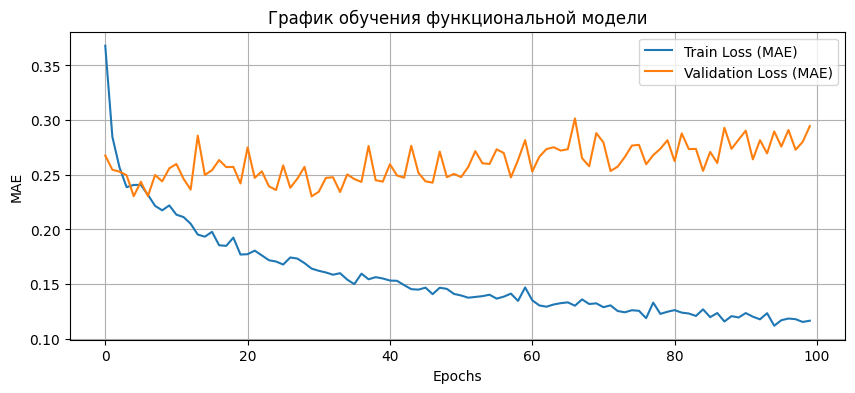

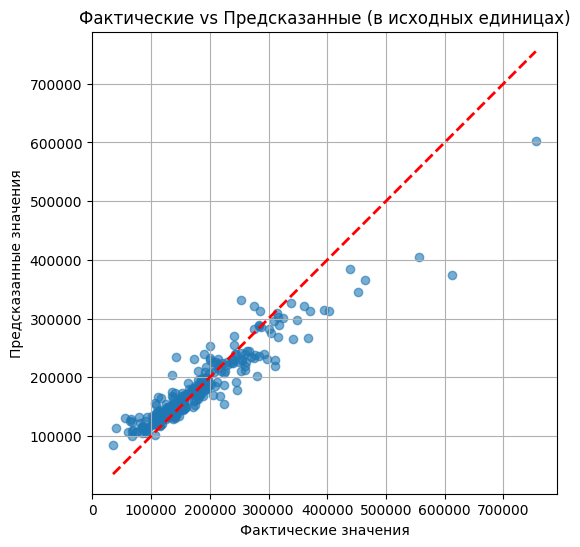

In [ ]:
def train_evaluate_functional(
    X_train, X_test, y_train, y_test,
    scaler_X, scaler_y,
    learning_rate=0.001,
    epochs=100,
    batch_size=16
):
    """
    Функция обучает и оценивает Functional API модель с двумя входами (категориальные + числовые).
    Вход:
      - X_train, X_test: numpy-массивы со всеми признаками, где:
           первые num_categorical_features столбцов — one-hot категориальные,
           а последние num_numeric_features столбцов — масштабированные числовые.
      - y_train, y_test: numpy-массивы размерности (n_samples, 1), масштабированные через scaler_y.
      - scaler_X: RobustScaler, применённый к числовым признакам при подготовке X.
      - scaler_y: RobustScaler, применённый к целевой переменной y.
      - learning_rate: скорость обучения для Adam.
      - epochs, batch_size: параметры обучения.
    Вывод (в консоль и на графиках):
      – MAE, MSE, RMSE, R², MAPE (в исходных единицах, полученных через inverse_transform scaler_y);
      – график обучения (Train vs Validation Loss по эпохам);
      – график «Фактические vs Предсказанные» (в исходных единицах).
    Возвращает: обученную Functional модель.
    """

    # Определяем количество числовых признаков из scaler_X
    num_numeric_features = scaler_X.scale_.shape[0]
    total_features = X_train.shape[1]
    num_categorical_features = total_features - num_numeric_features

    # Делим X_train и X_test на две части
    X_categorical_train = X_train[:, :num_categorical_features]
    X_numeric_train     = X_train[:, num_categorical_features:]
    X_categorical_test  = X_test[:, :num_categorical_features]
    X_numeric_test      = X_test[:, num_categorical_features:]

    # 1. Создание входных слоёв
    input_numeric     = Input(shape=(num_numeric_features,), name='numeric_input')
    input_categorical = Input(shape=(num_categorical_features,), name='categorical_input')

    # 2. Обработка числовых признаков
    x_num = Dense(64, activation='relu')(input_numeric)
    x_num = Dense(32, activation='relu')(x_num)

    # 3. Обработка категориальных признаков
    x_cat = Dense(128, activation='relu')(input_categorical)
    x_cat = Dense(64, activation='relu')(x_cat)

    # 4. Объединение фич
    merged = Concatenate()([x_num, x_cat])
    x = Dense(64, activation='relu')(merged)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    output = Dense(1)(x)

    # 5. Сборка модели
    model = Model(inputs=[input_numeric, input_categorical], outputs=output)

    # 6. Компиляция
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

    # 7. Обучение
    history = model.fit(
        [X_numeric_train, X_categorical_train],
        y_train,
        validation_data=([X_numeric_test, X_categorical_test], y_test),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # 8. Предсказания (масштабированные)
    y_pred_scaled = model.predict([X_numeric_test, X_categorical_test]).reshape(-1, 1)
    y_test_scaled = y_test.reshape(-1, 1)

    # 9. Обратное преобразование y через scaler_y
    y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()
    y_true = scaler_y.inverse_transform(y_test_scaled).flatten()

    # 10. Вычисление метрик
    mae  = mean_absolute_error(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    # MAPE: вручную (без деления на ноль)
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

    print(f"MAE  (Mean Absolute Error)            : {mae:.2f}")
    print(f"MSE  (Mean Squared Error)             : {mse:.2f}")
    print(f"RMSE (Root Mean Squared Error)        : {rmse:.2f}")
    print(f"R²   (R-squared)                      : {r2:.4f}")
    print(f"MAPE (Mean Absolute Percentage Error) : {mape:.2f}%")

    # 11. График обучения (Train vs Validation Loss)
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'],   label='Train Loss (MAE)')
    plt.plot(history.history['val_loss'], label='Validation Loss (MAE)')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.title('График обучения функциональной модели')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 12. График "Фактические vs Предсказанные"
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    mn = min(y_true.min(), y_pred.min())
    mx = max(y_true.max(), y_pred.max())
    plt.plot([mn, mx], [mn, mx], 'r--', lw=2)
    plt.xlabel('Фактические значения')
    plt.ylabel('Предсказанные значения')
    plt.title('Фактические vs Предсказанные (в исходных единицах)')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    return model

model = train_evaluate_functional(
    X_train, X_test, y_train, y_test,
    scaler_X=scaler_X,
    scaler_y=scaler_y,
    learning_rate=0.001,
    epochs=100,
    batch_size=8)

Epoch 1/8
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5015 - mae: 0.5015 - val_loss: 0.2561 - val_mae: 0.2561
Epoch 2/8
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2762 - mae: 0.2762 - val_loss: 0.2661 - val_mae: 0.2661
Epoch 3/8
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2684 - mae: 0.2684 - val_loss: 0.2387 - val_mae: 0.2387
Epoch 4/8
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2616 - mae: 0.2616 - val_loss: 0.2657 - val_mae: 0.2657
Epoch 5/8
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2486 - mae: 0.2486 - val_loss: 0.2628 - val_mae: 0.2628
Epoch 6/8
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2370 - mae: 0.2370 - val_loss: 0.2414 - val_mae: 0.2414
Epoch 7/8
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2221 - mae: 0.2221 - val_loss: 0.2481 - val_mae: 0.2481
Epoch 8/8
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2376 - mae: 0.2376 - val_loss: 0.2344 - val_mae: 0.2344
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MAE  (Mean Absolute Erro

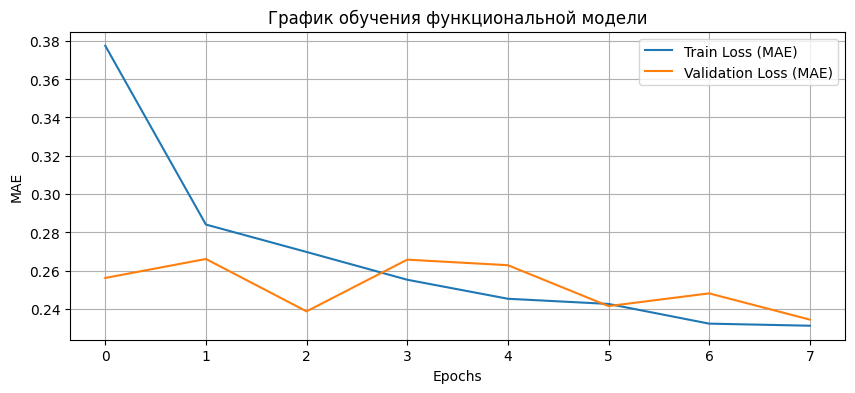

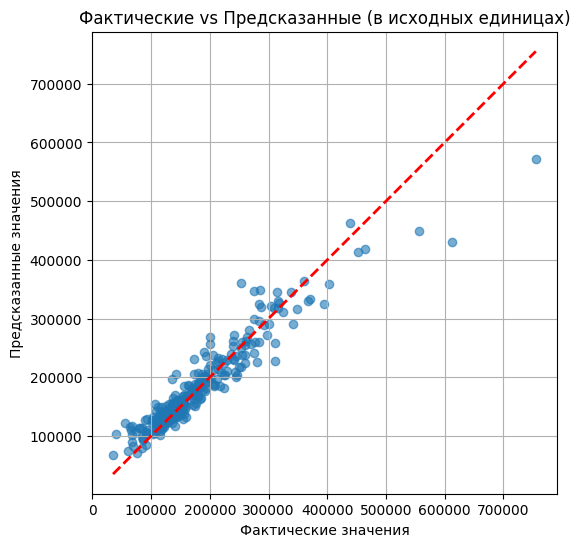

In [ ]:
model = train_evaluate_functional(
    X_train, X_test, y_train, y_test,
    scaler_X=scaler_X,
    scaler_y=scaler_y,
    learning_rate=0.001,
    epochs=8,
    batch_size=8)